In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
test_dataset = pd.read_csv('/content/test.csv')
train_dataset = pd.read_csv('/content/train.csv')

In [3]:
train_dataset.columns


Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [4]:
train_dataset.drop(columns=["id"], inplace=True)

In [5]:
train_dataset.shape

(140700, 19)

In [6]:
null_columns = train_dataset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802
Study Satisfaction,112803
Job Satisfaction,27910
Dietary Habits,4
Degree,2
Financial Stress,4


In [7]:
std_trainset = train_dataset[train_dataset['Working Professional or Student'] == 'Student']
std_trainset

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,3.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,Aaradhya,Female,27.0,Surat,Student,NaN,5.0,NaN,5.75,5.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,3.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
140690,Rashi,Female,18.0,Ludhiana,Student,NaN,5.0,NaN,6.88,2.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [8]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

,0
Profession,27867
Academic Pressure,9
Work Pressure,27898
CGPA,9
Study Satisfaction,10
Job Satisfaction,27893
Dietary Habits,2
Financial Stress,3


In [9]:
non_null_values = std_trainset[std_trainset['Work Pressure'].notnull()]
non_null_values

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
21880,Aarush,Male,38.0,Chennai,Student,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
75007,Aarav,Male,21.0,Lucknow,Student,NaN,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
129756,Kian,Male,18.0,Rajkot,Student,NaN,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1


Academic Pressure ve Study Satisfaction'ları Null öğrenci olmayabilirler. ama Profession'lar da null

In [10]:
non_null_values1 = std_trainset[std_trainset['Profession'].notnull()]
non_null_values1.count()

,0
Name,34
Gender,34
Age,34
City,34
Working Professional or Student,34
Profession,34
Academic Pressure,34
Work Pressure,0
CGPA,34
Study Satisfaction,34


In [11]:
non_null_values1.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
16959,Vidhi,Female,24.0,Mumbai,Student,Architect,3.0,NaN,8.89,5.0,NaN,More than 8 hours,Unhealthy,MSc,Yes,3.0,5.0,Yes,1
127070,Armaan,Male,32.0,Meerut,Student,Pharmacist,4.0,NaN,8.54,1.0,NaN,7-8 hours,Unhealthy,MBBS,Yes,2.0,5.0,Yes,1
18291,Ritvik,Male,32.0,Agra,Student,Educational Consultant,3.0,NaN,5.74,4.0,NaN,7-8 hours,Healthy,B.Ed,Yes,3.0,5.0,Yes,1
105237,Esha,Female,21.0,Chennai,Student,Entrepreneur,3.0,NaN,8.17,5.0,NaN,Less than 5 hours,Moderate,MCA,Yes,4.0,3.0,No,1
72541,Nandini,Female,28.0,Hyderabad,Student,Architect,3.0,NaN,6.99,3.0,NaN,5-6 hours,Moderate,BSc,Yes,10.0,5.0,Yes,1


Work Pressure ve Job Satisfaction attribute'ları boş. Staj yapıyor olabilirler mi?

In [12]:
non_null_values1.Depression.value_counts()

,count
Depression,
1,28
0,6


Hem okuyup hem çalışanlarda depreson yüksek

In [13]:
a = non_null_values1[non_null_values1["Work/Study Hours"] == 0.0]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
12425,Rupak,Male,25.0,Kalyan,Student,Content Writer,5.0,NaN,8.5,2.0,NaN,5-6 hours,Moderate,B.Ed,Yes,0.0,2.0,Yes,1


Öğrenci olarak çalışıp çalışma saati sıfır olan tek sütun var.

In [14]:
non_null_values2 = std_trainset[std_trainset['Job Satisfaction'].notnull()]
non_null_values2.count()

,0
Name,8
Gender,8
Age,8
City,8
Working Professional or Student,8
Profession,0
Academic Pressure,2
Work Pressure,3
CGPA,2
Study Satisfaction,2


In [15]:
a = non_null_values2[non_null_values2['Academic Pressure'].notnull()]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1428,Rishi,Male,29.0,Srinagar,Student,NaN,3.0,NaN,9.63,3.0,3.0,7-8 hours,Moderate,M.Pharm,No,8.0,5.0,No,0
116703,Neil,Male,25.0,Bangalore,Student,NaN,4.0,NaN,9.44,5.0,2.0,Less than 5 hours,Unhealthy,PhD,Yes,4.0,1.0,No,1


In [16]:
b = non_null_values2[non_null_values2['Work Pressure'].notnull()]
b

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
21880,Aarush,Male,38.0,Chennai,Student,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
75007,Aarav,Male,21.0,Lucknow,Student,NaN,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
129756,Kian,Male,18.0,Rajkot,Student,NaN,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1


Yaşa da bakmak gerek

In [17]:
age = std_trainset[std_trainset['Age']> 25]
age

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
33,Tanmay,Male,29.0,Pune,Student,NaN,2.0,NaN,5.70,3.0,NaN,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
52,Shrey,Male,30.0,Thane,Student,NaN,3.0,NaN,9.54,4.0,NaN,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140684,Gaurav,Male,31.0,Lucknow,Student,NaN,2.0,NaN,7.27,5.0,NaN,7-8 hours,Moderate,B.Com,Yes,6.0,1.0,Yes,0
140685,Aaradhya,Female,27.0,Surat,Student,NaN,5.0,NaN,5.75,5.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,3.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0


In [18]:
age1 = std_trainset[std_trainset['Age']> 30]
age1

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
62,Nirvaan,Male,31.0,Nashik,Student,NaN,2.0,NaN,8.38,3.0,NaN,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1
91,Aakash,Male,33.0,Vadodara,Student,NaN,3.0,NaN,7.03,4.0,NaN,Less than 5 hours,Healthy,BE,Yes,10.0,2.0,Yes,0
186,Pratham,Male,31.0,Ahmedabad,Student,NaN,2.0,NaN,6.08,5.0,NaN,7-8 hours,Moderate,LLB,Yes,3.0,3.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140536,Arya,Male,33.0,Nagpur,Student,NaN,1.0,NaN,7.39,4.0,NaN,7-8 hours,Unhealthy,BHM,No,12.0,2.0,No,0
140624,Vikram,Male,32.0,Rajkot,Student,NaN,4.0,NaN,9.19,1.0,NaN,5-6 hours,Healthy,MSc,No,7.0,4.0,Yes,1
140631,Kunal,Male,33.0,Ahmedabad,Student,NaN,1.0,NaN,5.70,2.0,NaN,Less than 5 hours,Healthy,MCA,Yes,2.0,2.0,No,0
140684,Gaurav,Male,31.0,Lucknow,Student,NaN,2.0,NaN,7.27,5.0,NaN,7-8 hours,Moderate,B.Com,Yes,6.0,1.0,Yes,0


In [19]:
age2 = std_trainset[std_trainset['Age']> 40]
age2.count()

,0
Name,19
Gender,19
Age,19
City,19
Working Professional or Student,19
Profession,0
Academic Pressure,19
Work Pressure,0
CGPA,19
Study Satisfaction,19


In [20]:
null_rows = age2[age2[['Profession', 'Work Pressure', 'Job Satisfaction']].isnull().all(axis=1)]

null_rows.count()


,0
Name,19
Gender,19
Age,19
City,19
Working Professional or Student,19
Profession,0
Academic Pressure,19
Work Pressure,0
CGPA,19
Study Satisfaction,19


In [21]:
null_rows.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
94978,Aarya,Female,46.0,Lucknow,Student,NaN,3.0,NaN,6.83,1.0,NaN,5-6 hours,Healthy,MCA,No,8.0,5.0,No,1
126970,Samaira,Female,48.0,Rajkot,Student,NaN,3.0,NaN,5.32,4.0,NaN,7-8 hours,Unhealthy,Class 12,No,1.0,4.0,Yes,1
27918,Aditi,Female,44.0,Srinagar,Student,NaN,1.0,NaN,6.83,3.0,NaN,Less than 5 hours,Unhealthy,BSc,No,4.0,3.0,No,0
68441,Advait,Male,54.0,Agra,Student,NaN,5.0,NaN,9.60,2.0,NaN,More than 8 hours,Unhealthy,B.Ed,Yes,9.0,3.0,Yes,0
130893,Shivam,Male,41.0,Patna,Student,NaN,3.0,NaN,5.85,1.0,NaN,5-6 hours,Moderate,Class 12,No,11.0,5.0,Yes,1


Bunlar öğrenci olup yaşlarını yanlış yazmış olabilirler mi?

In [22]:
null_rows["Degree"].value_counts()

,count
Degree,
Class 12,6
PhD,3
MBBS,2
BSc,2
B.Ed,2
LLB,1
MSc,1
MCA,1
MD,1


6 tanesinin lise diploması var

In [23]:
age3 = std_trainset[std_trainset['Age']> 50]
age3

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
14768,Aarohi,Female,58.0,Chennai,Student,NaN,4.0,NaN,8.58,1.0,NaN,7-8 hours,Healthy,Class 12,No,4.0,4.0,No,0
22004,Prisha,Female,51.0,Bhopal,Student,NaN,2.0,NaN,8.26,3.0,NaN,Less than 5 hours,Moderate,MBBS,Yes,5.0,5.0,Yes,0
46602,Shlok,Male,59.0,Nashik,Student,NaN,1.0,NaN,8.14,1.0,NaN,5-6 hours,Unhealthy,PhD,Yes,10.0,4.0,Yes,0
68441,Advait,Male,54.0,Agra,Student,NaN,5.0,NaN,9.60,2.0,NaN,More than 8 hours,Unhealthy,B.Ed,Yes,9.0,3.0,Yes,0
74887,Trisha,Female,56.0,Ludhiana,Student,NaN,3.0,NaN,7.94,5.0,NaN,5-6 hours,Unhealthy,BSc,No,1.0,5.0,Yes,0


In [24]:
age4 = std_trainset[std_trainset['Age']< 18]
age4

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [25]:
depresyon_percentage = std_trainset.groupby('City')['Depression'].mean() * 100
print(depresyon_percentage)

City
3.0                   100.000000
Agra                   53.473492
Ahmedabad              67.297581
Bangalore              60.886571
Bhavna                100.000000
Bhopal                 61.991435
Chennai                59.661017
City                   50.000000
Delhi                  60.937500
Faridabad              58.785249
Gaurav                100.000000
Ghaziabad              57.449664
Harsh                 100.000000
Harsha                 50.000000
Hyderabad              66.940299
Indore                 60.497667
Jaipur                 52.413127
Kalyan                 59.490446
Kanpur                 54.187192
Khaziabad             100.000000
Kibara                  0.000000
Kolkata                60.881801
Less Delhi              0.000000
Less than 5 Kalyan      0.000000
Lucknow                55.497835
Ludhiana               58.235824
M.Com                 100.000000
M.Tech                  0.000000
ME                      0.000000
Meerut                 59.757576
Mihir

In [26]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

Şehir isimlerinde sıkıntı var. City? 3.0? Less than 5 Kalyan? ME? M.Com?

In [27]:
city = std_trainset[(std_trainset["City"] == "City") |(std_trainset["City"] == "3.0") | (std_trainset["City"] == "ME") | (std_trainset["City"] == "M.COM") | (std_trainset["City"] == "Less than 5 Kalyan") | (std_trainset["City"] == "M.Tech")]
city

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
28672,Satyam,Male,29.0,M.Tech,Student,NaN,3.0,NaN,7.04,5.0,NaN,7-8 hours,Moderate,M.Tech,No,11.0,1.0,No,0
34300,Aanchal,Female,28.0,City,Student,NaN,3.0,NaN,7.49,3.0,NaN,7-8 hours,Unhealthy,Class 12,No,6.0,2.0,No,1
35309,Sanya,Female,21.0,3.0,Student,NaN,3.0,NaN,8.69,4.0,NaN,7-8 hours,Unhealthy,BCA,Yes,11.0,5.0,No,1
36993,Anand,Male,31.0,Less than 5 Kalyan,Student,NaN,1.0,NaN,7.21,1.0,NaN,5-6 hours,Healthy,M.Ed,No,2.0,1.0,No,0
93066,Chhavi,Female,25.0,ME,Student,NaN,2.0,NaN,6.00,2.0,NaN,7-8 hours,Healthy,BHM,Yes,8.0,1.0,No,0
120908,Vrinda,Female,29.0,City,Student,NaN,3.0,NaN,8.58,1.0,NaN,Less than 5 hours,Healthy,LLM,No,6.0,2.0,Yes,0


In [28]:
std_trainset = std_trainset[~((std_trainset["City"] == "City") |
                              (std_trainset["City"] == "3.0") |
                              (std_trainset["City"] == "ME") |
                              (std_trainset["City"] == "M.Com") |
                              (std_trainset["City"] == "Less than 5 Kalyan") |
                              (std_trainset["City"] == "M.Tech"))]

In [29]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'Bhavna', 'Less Delhi', 'Mira',
       'Harsha', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh', 'Kibara',
       'Rashi', 'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'],
      dtype=object)

Saanvi, Bhavna, Harsha, Vaanya, Gaurav, Reyansh, Kibara, Mihir, Nalini, Nandini: Bunlar Hindistan'da yaygın kullanılan kişi adlarıdır, şehir isimleri değildir.

In [30]:
city2 = std_trainset[(std_trainset["City"] == "Nalini") | (std_trainset["City"] == "Harsha") | (std_trainset["City"] == "Nandini") | (std_trainset["City"] == "Nalini") | (std_trainset["City"] == "Mihir") | (std_trainset["City"] == "Saanvi") |(std_trainset["City"] == "Bhavna") | (std_trainset["City"] == "Vaanya") | (std_trainset["City"] == "Gaurav") | (std_trainset["City"] == "Reyansh") | (std_trainset["City"] == "Kibara")]
city2

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
22293,Harsha,Male,27.0,Saanvi,Student,NaN,2.0,NaN,9.39,2.0,NaN,Less than 5 hours,Healthy,BCA,Yes,2.0,4.0,Yes,1
28862,Vikram,Male,30.0,Bhavna,Student,NaN,5.0,NaN,8.91,1.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,0.0,5.0,No,1
44087,Yuvraj,Male,29.0,Harsha,Student,NaN,3.0,NaN,8.62,1.0,NaN,5-6 hours,Unhealthy,LLB,Yes,12.0,1.0,No,1
63830,Gagan,Male,21.0,Vaanya,Student,NaN,1.0,NaN,9.79,5.0,NaN,More than 8 hours,Unhealthy,MSc,Yes,10.0,2.0,Yes,1
65042,Ira,Female,29.0,Gaurav,Student,NaN,3.0,NaN,9.44,1.0,NaN,5-6 hours,Unhealthy,M.Ed,Yes,10.0,5.0,Yes,1
70407,Amit,Male,20.0,Reyansh,Student,NaN,2.0,NaN,8.00,3.0,NaN,7-8 hours,Unhealthy,Class 12,No,7.0,2.0,No,0
71144,Aarav,Male,18.0,Bhavna,Student,NaN,2.0,NaN,6.86,5.0,NaN,5-6 hours,Moderate,Class 12,Yes,10.0,1.0,Yes,1
73510,Aditya,Male,21.0,Kibara,Student,NaN,2.0,NaN,7.27,2.0,NaN,7-8 hours,Unhealthy,B.Com,Yes,11.0,1.0,Yes,0
108698,Arjun,Male,31.0,Harsha,Student,NaN,3.0,NaN,6.69,4.0,NaN,More than 8 hours,Unhealthy,MD,No,8.0,3.0,No,0
123668,Ayush,Male,34.0,Mihir,Student,NaN,3.0,NaN,9.10,1.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,10.0,3.0,Yes,1


In [31]:
std_trainset = std_trainset[~((std_trainset["City"] == "Saanvi") |
                              (std_trainset["City"] == "Bhavna") |
                              (std_trainset["City"] == "Less Delhi") |
                              (std_trainset["City"] == "Reyansh") |
                              (std_trainset["City"] == "Kibara") |
                              (std_trainset["City"] == "Mihir") |
                              (std_trainset["City"] == "Nandini") |
                              (std_trainset["City"] == "Vaanya") |
                              (std_trainset["City"] == "Gaurav") |
                              (std_trainset["City"] == "Harsha") |
                              (std_trainset["City"] == "Nalini"))]

In [32]:
std_trainset.shape

(27880, 19)

Degree için de bakalım

In [33]:
std_trainset["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'MPA', 'BH', 'B.Sc', 'Bhopal', 'S.Tech', '20',
       'Class 11', 'M', 'P.Com', 'BPharm', 'Unite', 'BArch', 'Badhya',
       '0', 'Vivaan', 'BPA', 'Brit', 'B', '7.06', 'Brithika', 'CGPA',
       '24', 'Jhanvi', '8.56', 'LHM', 'Marsh', 'L.Ed', 'B.Student',
       'LL B.Ed', 'Mthanya', 'Esha', 'LLEd', 'E.Tech', 'LCA'],
      dtype=object)

### Geçerli Akademik Dereceler

#### Lisans Dereceleri (Undergraduate):
- B.Pharm
- BSc
- BA
- BCA
- B.Ed
- LLB
- BE
- BHM
- B.Com
- B.Arch
- B.Tech
- BBA
- B.Sc
- BPharm
- BArch
- BPA

#### Yüksek Lisans Dereceleri (Postgraduate):
- M.Tech
- PhD
- M.Ed
- MSc
- M.Pharm
- MCA
- MA
- MBA
- M.Com
- ME
- MHM
- MPA

#### Doktora ve Uzmanlık Dereceleri:
- PhD
- MD
- MBBS

#### Okul Düzeyi (School-Level):
- Class 12
- Class 11


In [34]:
invalid_degrees = ['20', '7.06', '8.56', '0', '24', 'Vivaan', 'Brithika', 'Jhanvi',
                   'Esha', 'Mthanya', 'Marsh', 'Unite', 'Brit', 'Badhya', 'S.Tech',
                   'E.Tech', 'CGPA', 'B.Student', 'LL B.Ed', 'LHM', 'L.Ed', 'LLEd', 'LCA']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Degree'].isin(invalid_degrees)]
invalid_rows.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
134938,Yogesh,Male,32.0,Mumbai,Student,NaN,2.0,NaN,5.45,3.0,NaN,More than 8 hours,Unhealthy,LCA,Yes,5.0,5.0,Yes,0
37627,Aadhya,Female,30.0,Ghaziabad,Student,NaN,3.0,NaN,6.56,1.0,NaN,Less than 5 hours,Unhealthy,Badhya,Yes,3.0,5.0,No,1
16067,Rudransh,Male,20.0,Lucknow,Student,NaN,2.0,NaN,9.36,3.0,NaN,7-8 hours,Unhealthy,20,No,2.0,5.0,No,1
68882,Harsha,Male,24.0,Rajkot,Student,NaN,3.0,NaN,8.89,3.0,NaN,7-8 hours,Unhealthy,24,Yes,9.0,5.0,No,1
61472,Gaurav,Male,23.0,Mumbai,Student,NaN,1.0,NaN,6.84,5.0,NaN,5-6 hours,Moderate,7.06,No,7.0,1.0,No,0


In [35]:
invalid_rows.shape

(23, 19)

In [36]:
std_trainset = std_trainset[~std_trainset['Degree'].isin(invalid_degrees)]

In [37]:
std_trainset.shape

(27857, 19)

Dietary Habits için de bakalım

In [38]:
std_trainset["Dietary Habits"].unique()

array(['Healthy', 'Moderate', 'Unhealthy', '3', 'Less than Healthy',
       'Mihir', '1.0', nan, 'No Healthy', 'Less Healthy', 'M.Tech',
       'Male', 'Yes', '2'], dtype=object)

In [39]:
invalid_habits = ['Mihir', '1.0', '3', 'M.Tech', '2', 'Yes', 'Male', 'Moderate']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Dietary Habits'].isin(invalid_habits)]
invalid_rows.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
30880,Gagan,Male,23.0,Lucknow,Student,NaN,3.0,NaN,5.57,1.0,NaN,More than 8 hours,Moderate,MBBS,Yes,9.0,2.0,Yes,1
129695,Vibha,Female,29.0,Pune,Student,NaN,2.0,NaN,6.33,1.0,NaN,5-6 hours,Moderate,B.Arch,Yes,5.0,3.0,No,0
84611,Vihaan,Male,23.0,Rajkot,Student,NaN,4.0,NaN,5.64,5.0,NaN,5-6 hours,Moderate,BE,No,0.0,5.0,Yes,1
8379,Parth,Male,21.0,Srinagar,Student,NaN,2.0,NaN,6.39,4.0,NaN,5-6 hours,Moderate,MCA,Yes,11.0,3.0,Yes,0
107107,Ishan,Male,27.0,Bhopal,Student,NaN,5.0,NaN,5.16,1.0,NaN,7-8 hours,Moderate,MBBS,No,11.0,4.0,No,1


In [40]:
moderate = std_trainset[std_trainset["Dietary Habits"] == "Moderate"]
moderate.shape

(9912, 19)

In [41]:
lessHealthy = std_trainset[(std_trainset["Dietary Habits"] == "Less Healthy") | (std_trainset["Dietary Habits"] == "Less than Healthy") ]
lessHealthy

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
34623,Dev,Male,18.0,Vadodara,Student,NaN,1.0,NaN,6.05,5.0,NaN,7-8 hours,Less than Healthy,Class 12,No,4.0,4.0,No,0
73210,Keshav,Male,26.0,Indore,Student,NaN,1.0,NaN,7.49,2.0,NaN,Less than 5 hours,Less Healthy,LLB,Yes,6.0,4.0,No,0


In [42]:
invalid_habits = ['Mihir', '1.0', '3', 'M.Tech', '2', 'Yes', 'Male', 'Less than Healthy', 'Less Healthy']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Dietary Habits'].isin(invalid_habits)]
invalid_rows.shape

(9, 19)

In [43]:
std_trainset = std_trainset[~std_trainset['Degree'].isin(invalid_habits)]

In [44]:
std_trainset.shape

(26836, 19)

Sleep Duration?

In [45]:
std_trainset["Sleep Duration"].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       '1-2 hours', '10-11 hours', '2-3 hours', 'Moderate', '55-66 hours',
       '3-4 hours', '4-5 hours', '8 hours', '45', 'than 5 hours',
       '6-7 hours'], dtype=object)

In [46]:
invalid_hours = ['45', '55-66 hours', 'Moderate']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Sleep Duration'].isin(invalid_hours)]
invalid_rows.shape

(3, 19)

In [47]:
std_trainset = std_trainset[~std_trainset['Sleep Duration'].isin(invalid_hours)]
std_trainset.shape

(26833, 19)

In [48]:
std_trainset["Sleep Duration"].value_counts()

,count
Sleep Duration,
Less than 5 hours,8010
7-8 hours,7050
5-6 hours,5945
More than 8 hours,5815
6-7 hours,4
2-3 hours,2
3-4 hours,2
1-2 hours,1
10-11 hours,1


In [49]:
std_trainset['Sleep Duration'] = std_trainset['Sleep Duration'].replace({
    'than 5 hours': 'Less than 5 hours',
    '1-2 hours': 'Less than 5 hours',
    '2-3 hours': 'Less than 5 hours',
    '3-4 hours': 'Less than 5 hours',
    '4-5 hours': '5-6 hours',
    '6-7 hours': '7-8 hours',
    '8 hours': '7-8 hours',
    '10-11 hours': 'More than 8 hours'
})

std_trainset["Sleep Duration"].value_counts()

,count
Sleep Duration,
Less than 5 hours,8016
7-8 hours,7055
5-6 hours,5946
More than 8 hours,5816


Bu da tamam şimdi suicidal thoughtsa bakalım

In [50]:
std_trainset["Have you ever had suicidal thoughts ?"].value_counts()

,count
Have you ever had suicidal thoughts ?,
Yes,17025
No,9808


Bu da temiz. family history?

In [51]:
std_trainset["Family History of Mental Illness"].value_counts()

,count
Family History of Mental Illness,
No,13826
Yes,13007


Bu da temiz. Peki Sayısal değerlerde sorun var mı

In [52]:
std_trainset["Financial Stress"].value_counts()

,count
Financial Stress,
5.0,6473
4.0,5544
3.0,5049
1.0,4899
2.0,4865


In [53]:
std_trainset["Work/Study Hours"].value_counts()

,count
Work/Study Hours,
10.0,4031
12.0,3040
11.0,2800
8.0,2433
6.0,2173
9.0,1945
7.0,1922
0.0,1661
4.0,1543


In [54]:
std_trainset["Study Satisfaction"].value_counts()

,count
Study Satisfaction,
4.0,6103
2.0,5628
3.0,5601
1.0,5244
5.0,4247


In [55]:
std_trainset["CGPA"].value_counts()

,count
CGPA,
8.0400,793
9.9600,406
5.7400,394
8.9500,361
9.2100,334
...,...
6.6400,1
7.0625,1
6.9800,1


Burada bir sorun olabilir ama olmaya da bilir

In [56]:
std_trainset["Academic Pressure"].value_counts()

,count
Academic Pressure,
3.0,7177
5.0,6078
4.0,5002
1.0,4597
2.0,3970


Son kez bi null'lara bakalım

In [57]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

,0
Profession,26799
Academic Pressure,9
Work Pressure,26830
CGPA,9
Study Satisfaction,10
Job Satisfaction,26825
Dietary Habits,2
Financial Stress,3


In [58]:
null_rows1 = std_trainset[std_trainset[['Financial Stress']].isnull().all(axis=1)]

null_rows1


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
22377,Manvi,Female,32.0,Varanasi,Student,NaN,3.0,NaN,5.64,1.0,NaN,5-6 hours,Healthy,BCA,No,12.0,NaN,No,1
68910,Arav,Male,29.0,Hyderabad,Student,NaN,2.0,NaN,8.94,3.0,NaN,Less than 5 hours,Unhealthy,B.Ed,No,12.0,NaN,Yes,0
97610,Pari,Female,20.0,Kolkata,Student,NaN,1.0,NaN,6.83,1.0,NaN,5-6 hours,Healthy,MBBS,No,9.0,NaN,Yes,0


In [59]:
std_trainset['Financial Stress'] = std_trainset['Financial Stress'].fillna(0)

In [60]:
atts_withNull = ['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Dietary Habits']
for column in atts_withNull:
    if std_trainset[column].isnull().sum() > 0:  # Eğer sütun eksik değer içeriyorsa
        most_frequent_value = std_trainset[column].mode()[0]  # Sütunun modunu al
        std_trainset[column].fillna(most_frequent_value, inplace=True)  # Eksik değerleri doldur


<ipython-input-60-cf10e94047f3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  std_trainset[column].fillna(most_frequent_value, inplace=True)  # Eksik değerleri doldur


In [61]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

,0
Profession,26799
Work Pressure,26830
Job Satisfaction,26825


In [62]:
std_trainset.shape

(26833, 19)

In [63]:
a = std_trainset[std_trainset["Profession"].notnull() ]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
609,Anand,Male,21.0,Ahmedabad,Student,Civil Engineer,5.0,NaN,7.83,1.0,NaN,5-6 hours,Healthy,MSc,Yes,11.0,3.0,Yes,1
2105,Shreya,Female,31.0,Vadodara,Student,Architect,5.0,NaN,6.95,3.0,NaN,Less than 5 hours,Moderate,BSc,No,8.0,1.0,Yes,1
9483,Vidya,Female,32.0,Kalyan,Student,UX/UI Designer,3.0,NaN,9.60,2.0,NaN,7-8 hours,Moderate,PhD,Yes,5.0,3.0,No,1
11470,Anjali,Female,28.0,Ahmedabad,Student,Digital Marketer,5.0,NaN,9.72,3.0,NaN,More than 8 hours,Healthy,MA,Yes,10.0,5.0,Yes,1
12425,Rupak,Male,25.0,Kalyan,Student,Content Writer,5.0,NaN,8.50,2.0,NaN,5-6 hours,Moderate,B.Ed,Yes,0.0,2.0,Yes,1
16196,Ivaan,Male,33.0,Jaipur,Student,Architect,2.0,NaN,7.13,4.0,NaN,More than 8 hours,Moderate,MSc,No,2.0,5.0,Yes,1
16959,Vidhi,Female,24.0,Mumbai,Student,Architect,3.0,NaN,8.89,5.0,NaN,More than 8 hours,Unhealthy,MSc,Yes,3.0,5.0,Yes,1
18291,Ritvik,Male,32.0,Agra,Student,Educational Consultant,3.0,NaN,5.74,4.0,NaN,7-8 hours,Healthy,B.Ed,Yes,3.0,5.0,Yes,1
19226,Rupak,Male,31.0,Rajkot,Student,Teacher,3.0,NaN,7.48,5.0,NaN,5-6 hours,Unhealthy,MD,Yes,12.0,2.0,Yes,1
20049,Himani,Female,24.0,Kolkata,Student,Student,1.0,NaN,7.32,4.0,NaN,More than 8 hours,Moderate,MA,Yes,8.0,3.0,Yes,0


Anladığım kadarıyla öğrenciler bölümlerini yazmıslar o yüzden professionları null değil

In [64]:
a = std_trainset[std_trainset["Work Pressure"].notnull() ]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
21880,Aarush,Male,38.0,Chennai,Student,NaN,3.0,5.0,8.04,4.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
75007,Aarav,Male,21.0,Lucknow,Student,NaN,3.0,2.0,8.04,4.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
129756,Kian,Male,18.0,Rajkot,Student,NaN,3.0,5.0,8.04,4.0,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1


In [65]:
a = std_trainset[std_trainset["Job Satisfaction"].notnull() ]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1428,Rishi,Male,29.0,Srinagar,Student,NaN,3.0,NaN,9.63,3.0,3.0,7-8 hours,Moderate,M.Pharm,No,8.0,5.0,No,0
21880,Aarush,Male,38.0,Chennai,Student,NaN,3.0,5.0,8.04,4.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
70453,Veda,Female,20.0,Ahmedabad,Student,NaN,3.0,NaN,8.04,4.0,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
75007,Aarav,Male,21.0,Lucknow,Student,NaN,3.0,2.0,8.04,4.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
105773,Anand,Male,18.0,Ahmedabad,Student,NaN,3.0,NaN,8.04,4.0,1.0,Less than 5 hours,Moderate,Class 12,Yes,9.0,5.0,No,1
116703,Neil,Male,25.0,Bangalore,Student,NaN,4.0,NaN,9.44,5.0,2.0,Less than 5 hours,Unhealthy,PhD,Yes,4.0,1.0,No,1
129756,Kian,Male,18.0,Rajkot,Student,NaN,3.0,5.0,8.04,4.0,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1
134830,Aaradhya,Female,24.0,Meerut,Student,NaN,3.0,NaN,8.04,4.0,2.0,More than 8 hours,Unhealthy,Class 12,No,0.0,5.0,No,0


In [66]:
std_trainset = std_trainset[~(std_trainset["Job Satisfaction"].notnull() | std_trainset["Work Pressure"].notnull())]

In [67]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

,0
Profession,26791
Work Pressure,26825
Job Satisfaction,26825


In [68]:
std_trainset.loc[std_trainset["Profession"].notnull(), "Profession"] = None

In [69]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

,0
Profession,26825
Work Pressure,26825
Job Satisfaction,26825


In [70]:
std_trainset = std_trainset.drop(columns=["Name", "Working Professional or Student","Profession", "Work Pressure", "Job Satisfaction"])

In [71]:
std_trainset.sample(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
108087,Male,34.0,Rajkot,5.0,9.97,4.0,More than 8 hours,Healthy,MA,No,6.0,4.0,No,0
89505,Female,20.0,Ahmedabad,2.0,9.97,4.0,Less than 5 hours,Unhealthy,Class 12,Yes,0.0,4.0,No,0
36856,Male,29.0,Lucknow,2.0,6.84,3.0,7-8 hours,Unhealthy,B.Ed,Yes,8.0,2.0,No,0
120945,Male,19.0,Vadodara,2.0,8.90,3.0,5-6 hours,Healthy,Class 12,Yes,7.0,2.0,Yes,0
35079,Female,27.0,Kalyan,4.0,9.72,1.0,5-6 hours,Moderate,MSc,Yes,8.0,2.0,Yes,1


In [72]:
std_trainset.shape

(26825, 14)

In [73]:
std_trainset["Degree"].value_counts()

,count
Degree,
Class 12,6070
B.Ed,1865
B.Com,1505
B.Arch,1477
BCA,1431
MSc,1188
B.Tech,1152
MCA,1044
BHM,924


In [74]:
std_trainset["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'PhD', 'Class 12', 'B.Ed', 'LLB',
       'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com', 'MD',
       'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA', 'ME',
       'MHM', 'MPA', 'BH', 'B.Sc', 'Bhopal', 'Class 11', 'M', 'P.Com',
       'BPharm', 'BArch', 'BPA', 'B'], dtype=object)

Bu kadar çok degree arasında nasıl hiyerarşi kuracağım?

### Ufak araştırma sonucu
- B ile başlayanların Bachealor yani Lisans olduklarını
- M ile başlayanlar Master yani Yüksek Lisans
- P ile başlayanlar ise Phd
- Class ile başlayanlar ise Lise

In [75]:
# Eğitim seviyelerini sıralı şekilde kodlamak
degree_mapping = {
    'Class 12': "HighSchool",  # Ortaöğretim
    'Class 11': "HighSchool",  # Ortaöğretim
    'B.Pharm': "Bachealor",   # Lisans
    'BSc': "Bachealor",       # Lisans
    'BA': "Bachealor",        # Lisans
    'BCA': "Bachealor",       # Lisans
    'B.Ed': "Bachealor",      # Lisans
    'LLB': "Bachealor",       # Lisans
    'BE': "Bachealor",        # Lisans
    'B.Tech': "Bachealor",    # Lisans
    'BBA': "Bachealor",       # Lisans
    'B.Arch': "Bachealor",    # Lisans
    'M.Ed': "Master",      # Yüksek Lisans
    'MSc': "Master",       # Yüksek Lisans
    'M.Pharm': "Master",   # Yüksek Lisans
    'MBA': "Master",       # Yüksek Lisans
    'MD': "Master",        # Yüksek Lisans
    'MBBS': "Master",      # Yüksek Lisans
    'MCA': "Master",       # Yüksek Lisans
    'M.Com': "Master",     # Yüksek Lisans
    'LLM': "Master",       # Yüksek Lisans
    'ME': "Master",        # Yüksek Lisans
    'PhD': "Phd"        # Doktora
}

# Veriye uygulama
std_trainset['Degree'] = std_trainset['Degree'].map(degree_mapping)

# Eksik veya hatalı değerleri kontrol etme
std_trainset['Degree'].value_counts()

,count
Degree,
Bachealor,10199
Master,6860
HighSchool,6071
Phd,520


In [76]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_degree = std_trainset.groupby('Degree')['Depression'].value_counts(normalize=True).unstack() * 100

# Depresyon riski yüzdelerini göster
print(depression_by_degree)


Depression          0          1
Degree                          
Bachealor   43.837631  56.162369
HighSchool  29.204414  70.795586
Master      45.830904  54.169096
Phd         45.192308  54.807692


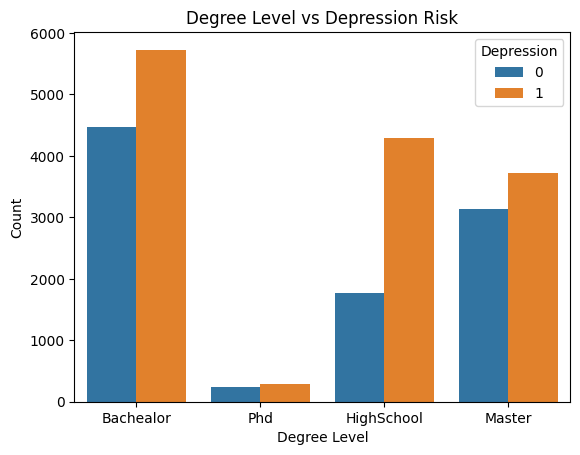

In [77]:
sn.countplot(x='Degree', hue='Depression', data=std_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [78]:
std_trainset["City"].value_counts()

,count
City,
Kalyan,1522
Srinagar,1326
Hyderabad,1279
Vasai-Virar,1261
Thane,1089
Lucknow,1087
Ludhiana,1074
Agra,1065
Surat,1033


In [79]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_degree = std_trainset.groupby('City')['Depression'].value_counts(normalize=True).unstack() * 100

depression_by_degree_sorted = depression_by_degree[1].sort_values(ascending=False)

# Sıralanmış sonucu görmek
print(depression_by_degree_sorted)

City
Mira             100.000000
Khaziabad        100.000000
Harsh            100.000000
Ahmedabad         67.573449
Hyderabad         67.396403
Patna             63.617886
Rajkot            62.831858
Bhopal            62.307692
Kolkata           61.607143
Bangalore         61.216216
Indore            60.925040
Delhi             60.776439
Meerut            60.408685
Chennai           59.740260
Kalyan            59.592641
Thane             59.228650
Surat             58.954501
Faridabad         58.574610
Ludhiana          58.100559
Ghaziabad         57.865169
Visakhapatnam     57.605178
Vasai-Virar       57.176844
Vadodara          56.521739
Pune              56.363636
Nagpur            56.310680
Lucknow           55.841766
Srinagar          55.806938
Mumbai            55.325444
Kanpur            55.172414
Agra              53.521127
Varanasi          53.082707
Nashik            52.641879
Jaipur            52.631579
Nalyan                  NaN
Rashi                   NaN
Name: 1, dtype:

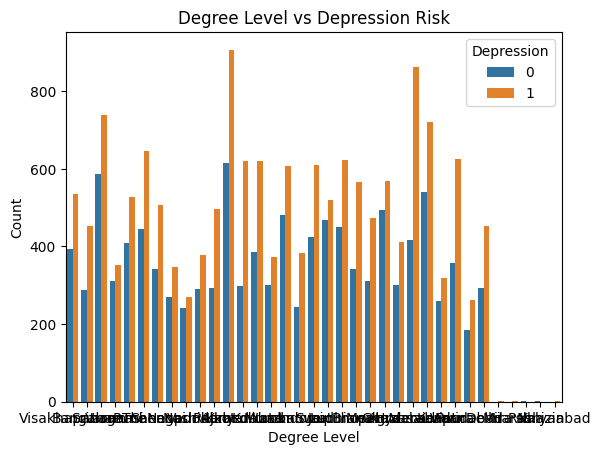

In [80]:
sn.countplot(x='City', hue='Depression', data=std_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [81]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Pune',
       'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara', 'Rajkot',
       'Kalyan', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow', 'Indore',
       'Surat', 'Jaipur', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Mira', 'Harsh', 'Rashi', 'Nalyan',
       'Khaziabad'], dtype=object)

Vasai-Virar >> Mumbai
Rashi şehir değil
Nalyan da değil

In [82]:
a = std_trainset [ (std_trainset["Degree"] ==  "HighSchool") & (std_trainset["Age"] > 40)  ]
a

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
5569,Female,42.0,Rajkot,2.0,9.03,5.0,More than 8 hours,Moderate,HighSchool,Yes,3.0,1.0,Yes,0
14768,Female,58.0,Chennai,4.0,8.58,1.0,7-8 hours,Healthy,HighSchool,No,4.0,4.0,No,0
17213,Male,49.0,Nagpur,3.0,6.47,3.0,5-6 hours,Moderate,HighSchool,Yes,2.0,1.0,Yes,0
118005,Male,42.0,Ludhiana,5.0,5.32,4.0,7-8 hours,Unhealthy,HighSchool,No,12.0,5.0,Yes,1
126970,Female,48.0,Rajkot,3.0,5.32,4.0,7-8 hours,Unhealthy,HighSchool,No,1.0,4.0,Yes,1
130893,Male,41.0,Patna,3.0,5.85,1.0,5-6 hours,Moderate,HighSchool,No,11.0,5.0,Yes,1


In [83]:
std_trainset = std_trainset[~(std_trainset["Degree"] ==  "HighSchool") & (std_trainset["Age"] > 20)]

In [84]:
std_trainset.shape

(20700, 14)

In [85]:
a = std_trainset [ (std_trainset["Degree"] ==  "HighSchool")  ]
a

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


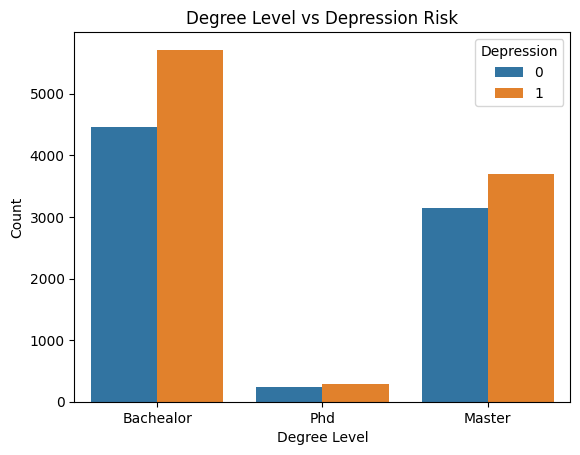

In [86]:
sn.countplot(x='Degree', hue='Depression', data=std_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [87]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_degree = std_trainset.groupby('Degree')['Depression'].value_counts(normalize=True).unstack() * 100

# Depresyon riski yüzdelerini göster
print(depression_by_degree)


Depression          0          1
Degree                          
Bachealor   43.848270  56.151730
Master      45.863783  54.136217
Phd         45.192308  54.807692


In [88]:
encoded_df = pd.get_dummies(std_trainset, columns=['Degree'], prefix='Degree')
encoded_df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Degree_Bachealor,Degree_Master,Degree_Phd
2,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1,True,False,False
8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0,True,False,False
26,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0,True,False,False
30,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1,True,False,False
33,Male,29.0,Pune,2.0,5.70,3.0,Less than 5 hours,Healthy,No,4.0,1.0,No,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140681,Male,23.0,Srinagar,3.0,6.00,2.0,More than 8 hours,Healthy,Yes,12.0,4.0,No,0,False,True,False
140684,Male,31.0,Lucknow,2.0,7.27,5.0,7-8 hours,Moderate,Yes,6.0,1.0,Yes,0,False,False,False
140686,Male,27.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,Healthy,No,0.0,3.0,Yes,0,False,True,False
140689,Male,31.0,Faridabad,3.0,6.61,4.0,5-6 hours,Unhealthy,No,12.0,2.0,No,0,False,True,False


In [89]:
depression_by_city = std_trainset.groupby(['City', 'Depression']).size().unstack(fill_value=0)
depression_by_city_count = depression_by_city[1]
depression_by_city_count_sorted = depression_by_city_count

# Sonuçları yazdır
print(depression_by_city_count_sorted)

City
Agra             433
Ahmedabad        393
Bangalore        260
Bhopal           406
Chennai          337
Delhi            295
Faridabad        176
Ghaziabad        325
Harsh              1
Hyderabad        676
Indore           217
Jaipur           456
Kalyan           741
Kanpur           230
Khaziabad          1
Kolkata          425
Lucknow          451
Ludhiana         363
Meerut           372
Mumbai           247
Nagpur           242
Nalyan             0
Nashik           222
Patna            508
Pune             372
Rajkot           352
Rashi              0
Srinagar         541
Surat            433
Thane            463
Vadodara         287
Varanasi         262
Vasai-Virar      537
Visakhapatnam    430
Name: 1, dtype: int64


In [90]:
result = std_trainset.groupby(['City', 'Depression']).size().unstack(fill_value=0)

# Depression = 1'in oranını ekleme
result['Total'] = result[0] + result[1]
result['Depression_1_Ratio'] = (result[1] / result['Total']) * 100

# Son tablo
result = result.rename(columns={0: 'Depression_0_Count', 1: 'Depression_1_Count'})
result = result[['Depression_0_Count', 'Depression_1_Count']].reset_index()

print(result)

Depression           City  Depression_0_Count  Depression_1_Count
0                    Agra                 419                 433
1               Ahmedabad                 222                 393
2               Bangalore                 215                 260
3                  Bhopal                 292                 406
4                 Chennai                 260                 337
5                   Delhi                 247                 295
6               Faridabad                 146                 176
7               Ghaziabad                 259                 325
8                   Harsh                   0                   1
9               Hyderabad                 345                 676
10                 Indore                 181                 217
11                 Jaipur                 436                 456
12                 Kalyan                 542                 741
13                 Kanpur                 211                 230
14        

Ahmedabad

In [91]:
std_trainset = std_trainset[~(std_trainset['City'] == "Rashi") |
                            (std_trainset['City'] == "Nalyan") |
                            (std_trainset['City'] == "Khaziabad") |
                            (std_trainset['City'] == "Harsh") ]

In [92]:
depresyon_oranları = std_trainset.groupby('City')['Depression'].mean()

In [93]:
city_score_mapping = {
    'Ahmedabad': 67,
    'Hyderabad': 67,
    'Patna': 63,
    'Rajkot': 62,
    'Bhopal': 62,
    'Kolkata': 61,
    'Bangalore': 61,
    'Indore': 60,
    'Delhi': 60,
    'Meerut': 60,
    'Chennai': 59,
    'Kalyan': 59,
    'Thane': 59,
    'Surat': 58,
    'Faridabad': 58,
    'Ludhiana': 58,
    'Ghaziabad': 57,
    'Visakhapatnam': 57,
    'Vasai-Virar': 57,
    'Vadodara': 56,
    'Pune': 56,
    'Nagpur': 56,
    'Lucknow': 55,
    'Srinagar': 55,
    'Mumbai': 55,
    'Kanpur': 55,
    'Agra': 53,
    'Varanasi': 53,
    'Nashik': 52,
    'Jaipur': 52,
    'Nashik' : 51,
    'Agra' : 51,
    'Mumbai' : 50,
    'Varanasi': 49
}
# Mapleme sonucunu kontrol etme
std_trainset['City'] = std_trainset['City'].map(city_score_mapping)

std_trainset.value_counts()

<ipython-input-93-00cffbc8376b>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_trainset['City'] = std_trainset['City'].map(city_score_mapping)


Gender  Age   City  Academic Pressure  CGPA  Study Satisfaction  Sleep Duration     Dietary Habits  Degree     Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  Family History of Mental Illness  Depression
Female  21.0  49.0  2.0                6.89  2.0                 5-6 hours          Unhealthy       Master     Yes                                    11.0              5.0               No                                1             1
Male    26.0  61.0  3.0                9.21  3.0                 Less than 5 hours  Moderate        Bachealor  Yes                                    11.0              1.0               No                                0             1
                    4.0                9.34  2.0                 7-8 hours          Unhealthy       Bachealor  Yes                                    5.0               5.0               No                                1             1
                                       9.24  1.0                 More than 8 hours  Moderate        Bachealor  No                                     5.0               5.0               No                                1             1
                                       9.12  3.0                 7-8 hours          Healthy         Bachealor  Yes                                    5.0               3.0               No                                1             1
                                                                                                                                                                                                                                         ..
Female  31.0  58.0  5.0                5.74  3.0                 5-6 hours          Healthy         Master     No                                     7.0               1.0               Yes                               1             1
                                       6.39  2.0                 5-6 hours          Unhealthy       Bachealor  Yes                                    11.0              5.0               Yes                               1             1
                                       6.86  1.0                 7-8 hours          Unhealthy       Master     Yes                                    8.0               1.0               Yes                               1             1
                                       6.99  2.0                 Less than 5 hours  Moderate        Bachealor  Yes                                    10.0              5.0               No                                1             1
Male    59.0  51.0  1.0                8.14  1.0                 5-6 hours          Unhealthy       Phd        Yes                                    10.0              4.0               Yes                               0             1
Name: count, Length: 17534, dtype: int64

In [94]:
std_trainset.sample(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
57541,Female,31.0,62.0,1.0,6.86,1.0,7-8 hours,Unhealthy,Phd,Yes,0.0,5.0,No,1
90596,Male,28.0,51.0,1.0,5.97,5.0,More than 8 hours,Moderate,Master,No,1.0,3.0,Yes,0
29372,Female,28.0,56.0,2.0,7.45,3.0,7-8 hours,Moderate,Bachealor,Yes,7.0,2.0,Yes,0
116429,Male,26.0,60.0,2.0,9.89,4.0,Less than 5 hours,Moderate,Bachealor,Yes,10.0,3.0,Yes,1
109199,Female,22.0,61.0,3.0,9.39,1.0,5-6 hours,Unhealthy,Bachealor,No,11.0,5.0,No,1


In [95]:
std_trainset["Dietary Habits"].value_counts()

,count
Dietary Habits,
Moderate,7464
Unhealthy,7440
Healthy,5786
3,1
Mihir,1
1.0,1
No Healthy,1
Less Healthy,1
M.Tech,1


In [96]:
std_trainset["Sleep Duration"].value_counts()

,count
Sleep Duration,
Less than 5 hours,6198
7-8 hours,5481
5-6 hours,4627
More than 8 hours,4393


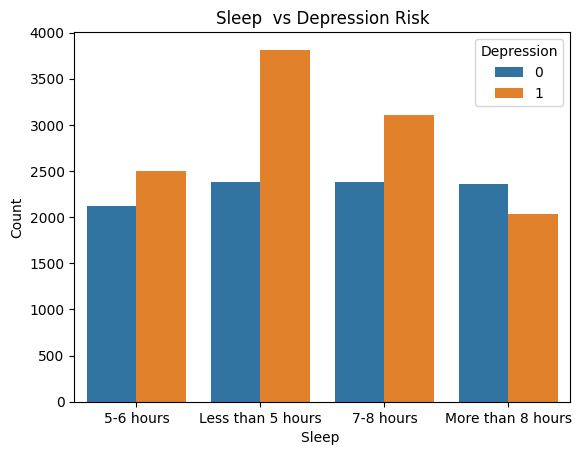

In [97]:
sn.countplot(x='Sleep Duration', hue='Depression', data=std_trainset)
plt.title('Sleep  vs Depression Risk')
plt.xlabel('Sleep ')
plt.ylabel('Count')
plt.show()

In [98]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_sleep = std_trainset.groupby('Sleep Duration')['Depression'].value_counts(normalize=True).unstack() * 100

depression_by_sleep_sorted = depression_by_sleep[1].sort_values(ascending=False)

# Sıralanmış sonucu görmek
print(depression_by_sleep_sorted)

Sleep Duration
Less than 5 hours    61.535979
7-8 hours            56.632001
5-6 hours            54.095526
More than 8 hours    46.278170
Name: 1, dtype: float64


In [99]:
sleep_mapping = {
    'Less than 5 hours' : 3,
    '7-8 hours': 2,
    '5-6 hours':1,
    'More than 8 hours':0
}

# Veriye uygulama
std_trainset['Sleep Duration'] = std_trainset['Sleep Duration'].map(sleep_mapping)

In [100]:
std_trainset['Sleep Duration'].unique()

array([1, 3, 2, 0])

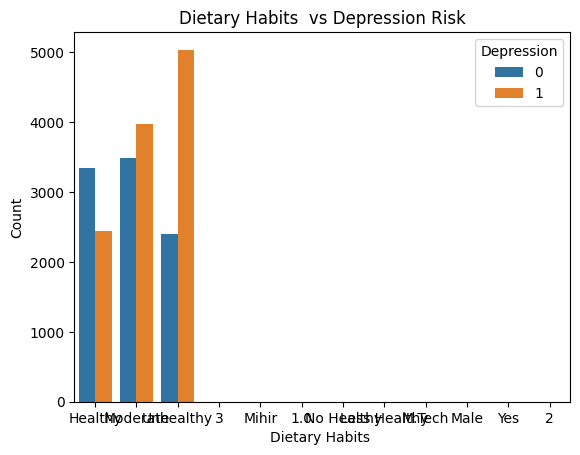

In [101]:
sn.countplot(x='Dietary Habits', hue='Depression', data=std_trainset)
plt.title('Dietary Habits  vs Depression Risk')
plt.xlabel('Dietary Habits ')
plt.ylabel('Count')
plt.show()


Beslenme Alışkanlıklarına Göre Depresyon Oranı (%):
Dietary Habits
1.0             100.000000
2                 0.000000
3               100.000000
Healthy          42.188040
Less Healthy      0.000000
M.Tech          100.000000
Male            100.000000
Mihir             0.000000
Moderate         53.202036
No Healthy      100.000000
Unhealthy        67.688172
Yes             100.000000
Name: Depression, dtype: float64


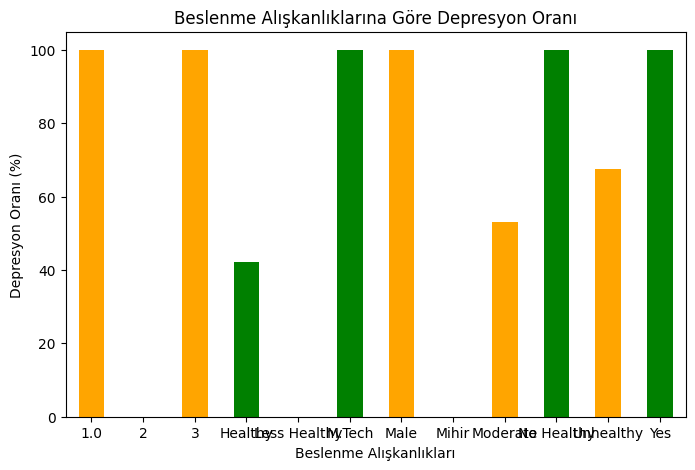

In [102]:
# Beslenme Alışkanlıklarına Göre Depresyon Oranını Hesaplama
depression_rate = std_trainset.groupby('Dietary Habits')['Depression'].mean() * 100

# Sonuçları Görüntüleme
print("Beslenme Alışkanlıklarına Göre Depresyon Oranı (%):")
print(depression_rate)

# Görsel Olarak Depresyon Oranı Dağılımı
plt.figure(figsize=(8, 5))
depression_rate.plot(kind='bar', color=['orange', 'green'])
plt.title("Beslenme Alışkanlıklarına Göre Depresyon Oranı")
plt.ylabel("Depresyon Oranı (%)")
plt.xlabel("Beslenme Alışkanlıkları")
plt.xticks(rotation=0)
plt.show()

In [103]:
# Gerekli kategorileri seçmek için filtreleme
filtered_data = std_trainset[std_trainset['Dietary Habits'].isin(['Unhealthy', 'Moderate', 'Healthy'])]

# Filtrelenmiş veriyi görüntüleme
print("Filtrelenmiş Veri:")
print(filtered_data['Dietary Habits'].value_counts())

# Filtreyi kaydetmek için yeni CSV
filtered_data.to_csv('filtered_data.csv', index=False)
print("Filtrelenmiş veri 'filtered_data.csv' dosyasına kaydedildi.")


Filtrelenmiş Veri:
Dietary Habits
Moderate     7464
Unhealthy    7440
Healthy      5786
Name: count, dtype: int64
Filtrelenmiş veri 'filtered_data.csv' dosyasına kaydedildi.


In [104]:

# Beslenme alışkanlıkları için sıralı bir encoding mappingi oluşturma
diet_mapping = {
    'Healthy': 0,        # Sağlıklı beslenme en düşük öneme sahip
    'Moderate': 1,       # Orta seviyede
    'Unhealthy': 2       # Sağlıksız beslenme en yüksek öneme sahip
}

# Veriye bu encodingi uygulama
std_trainset['Dietary Habits Encoded'] = std_trainset['Dietary Habits'].map(diet_mapping)

# Encoding sonrasında yeni veriyi gösterme
print(std_trainset[['Dietary Habits', 'Dietary Habits Encoded']].head())

# Filtrelenmiş veri üzerinde encoding işlemi (sadece Healthy, Moderate, Unhealthy olanlar)
filtered_data['Dietary Habits Encoded'] = filtered_data['Dietary Habits'].map(diet_mapping)

# Filtrelenmiş veriyi kaydetme
filtered_data.to_csv('filtered_data_encoded.csv', index=False)
print("Encoding işlemi tamamlandı ve filtrelenmiş veri kaydedildi.")


   Dietary Habits  Dietary Habits Encoded
2         Healthy                     0.0
8        Moderate                     1.0
26        Healthy                     0.0
30       Moderate                     1.0
33        Healthy                     0.0
Encoding işlemi tamamlandı ve filtrelenmiş veri kaydedildi.


<ipython-input-104-e3a9b227a7b3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Dietary Habits Encoded'] = filtered_data['Dietary Habits'].map(diet_mapping)


In [105]:
# İlk 5 veriyi görüntüleme
print(filtered_data.head(1))


  Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
2   Male  33.0  57.0                5.0  8.97                 2.0   

   Sleep Duration Dietary Habits     Degree  \
2               1        Healthy  Bachealor   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
2                                   Yes               3.0               1.0   

  Family History of Mental Illness  Depression  Dietary Habits Encoded  
2                               No           1                       0  


In [106]:
# 'Dietary Habits' sütununu silme
filtered_data = filtered_data.drop(columns=['Dietary Habits'])

# Güncellenmiş veriyi kontrol etme
print(filtered_data.head())


    Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
2     Male  33.0  57.0                5.0  8.97                 2.0   
8   Female  24.0  61.0                2.0  5.90                 5.0   
26    Male  31.0  55.0                3.0  7.03                 5.0   
30  Female  28.0  49.0                3.0  5.59                 2.0   
33    Male  29.0  56.0                2.0  5.70                 3.0   

    Sleep Duration     Degree Have you ever had suicidal thoughts ?  \
2                1  Bachealor                                   Yes   
8                1  Bachealor                                    No   
26               3  Bachealor                                    No   
30               2  Bachealor                                   Yes   
33               3        Phd                                    No   

    Work/Study Hours  Financial Stress Family History of Mental Illness  \
2                3.0               1.0                               No

In [107]:
print(filtered_data.head(1))


  Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
2   Male  33.0  57.0                5.0  8.97                 2.0   

   Sleep Duration     Degree Have you ever had suicidal thoughts ?  \
2               1  Bachealor                                   Yes   

   Work/Study Hours  Financial Stress Family History of Mental Illness  \
2               3.0               1.0                               No   

   Depression  Dietary Habits Encoded  
2           1                       0  


In [108]:
# Suicidal thoughts ve Family history of mental illness için binary encoding
std_trainset['Have you ever had suicidal thoughts ?'] = std_trainset['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
std_trainset['Family History of Mental Illness'] = std_trainset['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

# Kontrol etmek için ilk 5 satırı gözlemleyebilirsiniz
print(std_trainset.head())


    Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
2     Male  33.0  57.0                5.0  8.97                 2.0   
8   Female  24.0  61.0                2.0  5.90                 5.0   
26    Male  31.0  55.0                3.0  7.03                 5.0   
30  Female  28.0  49.0                3.0  5.59                 2.0   
33    Male  29.0  56.0                2.0  5.70                 3.0   

    Sleep Duration Dietary Habits     Degree  \
2                1        Healthy  Bachealor   
8                1       Moderate  Bachealor   
26               3        Healthy  Bachealor   
30               2       Moderate  Bachealor   
33               3        Healthy        Phd   

    Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
2                                       1               3.0               1.0   
8                                       0               3.0               2.0   
26                                      0

In [109]:
std_trainset = std_trainset.drop(columns=['Dietary Habits'])

In [110]:
print(std_trainset.head())


    Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
2     Male  33.0  57.0                5.0  8.97                 2.0   
8   Female  24.0  61.0                2.0  5.90                 5.0   
26    Male  31.0  55.0                3.0  7.03                 5.0   
30  Female  28.0  49.0                3.0  5.59                 2.0   
33    Male  29.0  56.0                2.0  5.70                 3.0   

    Sleep Duration     Degree  Have you ever had suicidal thoughts ?  \
2                1  Bachealor                                      1   
8                1  Bachealor                                      0   
26               3  Bachealor                                      0   
30               2  Bachealor                                      1   
33               3        Phd                                      0   

    Work/Study Hours  Financial Stress  Family History of Mental Illness  \
2                3.0               1.0                          

In [111]:
# Cinsiyet ve depresyon durumuna göre gruplama
gender_depression = std_trainset.groupby('Gender')['Depression'].value_counts(normalize=True).unstack().fillna(0) * 100

# Sonuçları yazdırma
print(gender_depression)

Depression          0          1
Gender                          
Female      44.753422  55.246578
Male        44.592361  55.407639


In [112]:
# Cinsiyet sütununu veri setinden kaldırma
std_trainset = std_trainset.drop(columns=['Gender'])

# Son hali kontrol etme
print(std_trainset.head())


     Age  City  Academic Pressure  CGPA  Study Satisfaction  Sleep Duration  \
2   33.0  57.0                5.0  8.97                 2.0               1   
8   24.0  61.0                2.0  5.90                 5.0               1   
26  31.0  55.0                3.0  7.03                 5.0               3   
30  28.0  49.0                3.0  5.59                 2.0               2   
33  29.0  56.0                2.0  5.70                 3.0               3   

       Degree  Have you ever had suicidal thoughts ?  Work/Study Hours  \
2   Bachealor                                      1               3.0   
8   Bachealor                                      0               3.0   
26  Bachealor                                      0               9.0   
30  Bachealor                                      1               4.0   
33        Phd                                      0               4.0   

    Financial Stress  Family History of Mental Illness  Depression  \
2         

In [113]:
# Degree ve Depression'a göre gruplama ve oranları hesaplama
degree_depression = std_trainset.groupby('Degree')['Depression'].value_counts(normalize=True).unstack().fillna(0) * 100

# Sonuçları yazdırma
print(degree_depression)


Depression          0          1
Degree                          
Bachealor   43.842752  56.157248
Master      45.863783  54.136217
Phd         45.192308  54.807692


In [115]:
# Degree sütununu veri setinden kaldırma
std_trainset = std_trainset.drop(columns=['Degree'])

# Son hali kontrol etme
print(std_trainset.head(10))


KeyError: "['Degree'] not found in axis"

In [116]:
print(std_trainset.head(20))


      Age  City  Academic Pressure  CGPA  Study Satisfaction  Sleep Duration  \
2    33.0  57.0                5.0  8.97                 2.0               1   
8    24.0  61.0                2.0  5.90                 5.0               1   
26   31.0  55.0                3.0  7.03                 5.0               3   
30   28.0  49.0                3.0  5.59                 2.0               2   
33   29.0  56.0                2.0  5.70                 3.0               3   
52   30.0  59.0                3.0  9.54                 4.0               2   
59   28.0  56.0                3.0  9.79                 1.0               2   
62   31.0  51.0                2.0  8.38                 3.0               3   
91   33.0  56.0                3.0  7.03                 4.0               3   
120  25.0  51.0                5.0  6.51                 2.0               3   
145  25.0  59.0                3.0  9.93                 3.0               1   
161  29.0  61.0                3.0  8.74

In [117]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [118]:
X = std_trainset.drop('Depression', axis=1)  # Özellikler
y = std_trainset['Depression']  # Hedef değişken

# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [123]:
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping
from sklearn.metrics import accuracy_score, classification_report

# Model oluştur
model = LGBMClassifier(
    objective='binary',
    metric='binary_error',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.8,
    n_estimators=1000,  # Maksimum ağaç sayısı
    random_state=42
)

# Modeli eğit
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Değerlendirme seti
    eval_metric='binary_error',
    callbacks=[early_stopping(stopping_rounds=50)]
)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 9163, number of negative: 7396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 16559, number of used features: 11
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg

In [125]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00


In [129]:
!pip install optuna-integration[lightgbm]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 4.0 MB/s eta 0:00:00


In [132]:
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
import optuna

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 50, 200),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 0.9),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 0.9),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100)
    }

    model = LGBMClassifier(**params, n_estimators=1000, random_state=42)

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_error',
              callbacks=[early_stopping(stopping_rounds=50), log_evaluation(10)])

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Optuna optimize function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get best parameters
best_params = study.best_params
print("Best parameters:", best_params)


[I 2024-12-19 07:02:48,201] A new study created in memory with name: no-name-6e562709-1a02-4530-9fd6-3bb73db51796


[LightGBM] [Warning] feature_fraction is set=0.8719132339908751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8719132339908751
[LightGBM] [Warning] lambda_l2 is set=0.0018469092417033972, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0018469092417033972
[LightGBM] [Warning] lambda_l1 is set=0.8315757657006101, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8315757657006101
[LightGBM] [Warning] bagging_fraction is set=0.6129596749840002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6129596749840002
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8719132339908751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8719132339908751
[LightGBM] [Warning] lambda_l2 is set=0.0018469092417033972, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0018469092417033972
[LightGBM] [Warning] lambda_l1 is set=0.831575765700

[I 2024-12-19 07:02:50,565] Trial 0 finished with value: 0.8297101449275363 and parameters: {'learning_rate': 0.058657101761065054, 'num_leaves': 177, 'feature_fraction': 0.8719132339908751, 'bagging_fraction': 0.6129596749840002, 'max_depth': 6, 'lambda_l1': 0.8315757657006101, 'lambda_l2': 0.0018469092417033972, 'min_child_samples': 26}. Best is trial 0 with value: 0.8297101449275363.


[LightGBM] [Warning] feature_fraction is set=0.7284543842147447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7284543842147447
[LightGBM] [Warning] lambda_l2 is set=2.2009614714057888e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2009614714057888e-06
[LightGBM] [Warning] lambda_l1 is set=0.16692005948390298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16692005948390298
[LightGBM] [Warning] bagging_fraction is set=0.7688485562719463, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7688485562719463
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7284543842147447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7284543842147447
[LightGBM] [Warning] lambda_l2 is set=2.2009614714057888e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2009614714057888e-06
[LightGBM] [Warning] lambda_l1 is set=0.166920

[I 2024-12-19 07:02:51,930] Trial 1 finished with value: 0.828743961352657 and parameters: {'learning_rate': 0.07297161149843577, 'num_leaves': 153, 'feature_fraction': 0.7284543842147447, 'bagging_fraction': 0.7688485562719463, 'max_depth': 9, 'lambda_l1': 0.16692005948390298, 'lambda_l2': 2.2009614714057888e-06, 'min_child_samples': 82}. Best is trial 0 with value: 0.8297101449275363.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[56]	valid_0's binary_error: 0.171256	valid_0's binary_logloss: 0.382775
[LightGBM] [Warning] feature_fraction is set=0.7284543842147447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7284543842147447
[LightGBM] [Warning] lambda_l2 is set=2.2009614714057888e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2009614714057888e-06
[LightGBM] [Warning] lambda_l1 is set=0.16692005948390298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16692005948390298
[LightGBM] [Warning] bagging_fraction is set=0.7688485562719463, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7688485562719463
[LightGBM] [Warning] feature_fraction is set=0.6448270578371875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6448270578371875
[LightGBM]

[I 2024-12-19 07:02:52,854] Trial 2 finished with value: 0.8306763285024155 and parameters: {'learning_rate': 0.026679142671348258, 'num_leaves': 62, 'feature_fraction': 0.6448270578371875, 'bagging_fraction': 0.6509453975759345, 'max_depth': 7, 'lambda_l1': 2.699390879437323e-05, 'lambda_l2': 0.00027687444897718055, 'min_child_samples': 29}. Best is trial 2 with value: 0.8306763285024155.


[130]	valid_0's binary_error: 0.17029	valid_0's binary_logloss: 0.384485
Early stopping, best iteration is:
[86]	valid_0's binary_error: 0.169324	valid_0's binary_logloss: 0.40433
[LightGBM] [Warning] feature_fraction is set=0.6448270578371875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6448270578371875
[LightGBM] [Warning] lambda_l2 is set=0.00027687444897718055, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027687444897718055
[LightGBM] [Warning] lambda_l1 is set=2.699390879437323e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.699390879437323e-05
[LightGBM] [Warning] bagging_fraction is set=0.6509453975759345, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6509453975759345
[LightGBM] [Warning] feature_fraction is set=0.7094432613429557, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7094432613429557
[LightGBM] [Warning] lambda_l2 is set=0.0004512738008849027, reg_lambda=0.0 will be 

[I 2024-12-19 07:02:54,167] Trial 3 finished with value: 0.8304347826086956 and parameters: {'learning_rate': 0.03367383890611876, 'num_leaves': 81, 'feature_fraction': 0.7094432613429557, 'bagging_fraction': 0.7110524002086837, 'max_depth': 4, 'lambda_l1': 0.0015142734308357445, 'lambda_l2': 0.0004512738008849027, 'min_child_samples': 58}. Best is trial 2 with value: 0.8306763285024155.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's binary_error: 0.170048	valid_0's binary_logloss: 0.380631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2024-12-19 07:02:55,015] Trial 4 finished with value: 0.8309178743961353 and parameters: {'learning_rate': 0.02838184086623045, 'num_leaves': 55, 'feature_fraction': 0.8323004387634027, 'bagging_fraction': 0.6492923532409762, 'max_depth': 8, 'lambda_l1': 0.0005331057380845191, 'lambda_l2': 4.581456055935341e-08, 'min_child_samples': 46}. Best is trial 4 with value: 0.8309178743961353.


[190]	valid_0's binary_error: 0.168599	valid_0's binary_logloss: 0.382771
[200]	valid_0's binary_error: 0.167633	valid_0's binary_logloss: 0.383175
Early stopping, best iteration is:
[151]	valid_0's binary_error: 0.169082	valid_0's binary_logloss: 0.382282
[LightGBM] [Warning] feature_fraction is set=0.8323004387634027, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8323004387634027
[LightGBM] [Warning] lambda_l2 is set=4.581456055935341e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.581456055935341e-08
[LightGBM] [Warning] lambda_l1 is set=0.0005331057380845191, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005331057380845191
[LightGBM] [Warning] bagging_fraction is set=0.6492923532409762, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6492923532409762
[LightGBM] [Warning] feature_fraction is set=0.8669804597374536, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8669804597374536
[LightGBM

[I 2024-12-19 07:02:55,812] Trial 5 finished with value: 0.8297101449275363 and parameters: {'learning_rate': 0.03556142181188217, 'num_leaves': 79, 'feature_fraction': 0.8669804597374536, 'bagging_fraction': 0.7453421940811644, 'max_depth': 11, 'lambda_l1': 2.124040972315227, 'lambda_l2': 3.8538965451567265e-07, 'min_child_samples': 68}. Best is trial 4 with value: 0.8309178743961353.


[LightGBM] [Warning] feature_fraction is set=0.8638502511318538, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8638502511318538
[LightGBM] [Warning] lambda_l2 is set=8.390627536196787e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.390627536196787e-08
[LightGBM] [Warning] lambda_l1 is set=0.20855889591320564, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20855889591320564
[LightGBM] [Warning] bagging_fraction is set=0.6268208053669136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6268208053669136
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8638502511318538, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8638502511318538
[LightGBM] [Warning] lambda_l2 is set=8.390627536196787e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.390627536196787e-08
[LightGBM] [Warning] lambda_l1 is set=0.2085588959

[I 2024-12-19 07:02:56,304] Trial 6 finished with value: 0.8277777777777777 and parameters: {'learning_rate': 0.07675456714738567, 'num_leaves': 191, 'feature_fraction': 0.8638502511318538, 'bagging_fraction': 0.6268208053669136, 'max_depth': 5, 'lambda_l1': 0.20855889591320564, 'lambda_l2': 8.390627536196787e-08, 'min_child_samples': 25}. Best is trial 4 with value: 0.8309178743961353.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_error: 0.173913	valid_0's binary_logloss: 0.38054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-12-19 07:02:56,717] Trial 7 finished with value: 0.828743961352657 and parameters: {'learning_rate': 0.0208755678292808, 'num_leaves': 61, 'feature_fraction': 0.7731504597847524, 'bagging_fraction': 0.7259653351776788, 'max_depth': 11, 'lambda_l1': 5.228184266850557e-07, 'lambda_l2': 5.1803329167594845e-05, 'min_child_samples': 58}. Best is trial 4 with value: 0.8309178743961353.


Early stopping, best iteration is:
[39]	valid_0's binary_error: 0.171256	valid_0's binary_logloss: 0.484088
[LightGBM] [Warning] feature_fraction is set=0.7731504597847524, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7731504597847524
[LightGBM] [Warning] lambda_l2 is set=5.1803329167594845e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.1803329167594845e-05
[LightGBM] [Warning] lambda_l1 is set=5.228184266850557e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.228184266850557e-07
[LightGBM] [Warning] bagging_fraction is set=0.7259653351776788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7259653351776788
[LightGBM] [Warning] feature_fraction is set=0.8303374658490271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8303374658490271
[LightGBM] [Warning] lambda_l2 is set=3.955716121147267e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.955716121147267e-05
[LightGBM] [Warn

[I 2024-12-19 07:02:57,500] Trial 8 finished with value: 0.8294685990338164 and parameters: {'learning_rate': 0.04725588523818041, 'num_leaves': 164, 'feature_fraction': 0.8303374658490271, 'bagging_fraction': 0.7553508752126108, 'max_depth': 9, 'lambda_l1': 3.7632960560491406e-05, 'lambda_l2': 3.955716121147267e-05, 'min_child_samples': 92}. Best is trial 4 with value: 0.8309178743961353.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's binary_error: 0.171014	valid_0's binary_logloss: 0.383531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2024-12-19 07:02:58,208] Trial 9 finished with value: 0.8323671497584542 and parameters: {'learning_rate': 0.02525716839816021, 'num_leaves': 108, 'feature_fraction': 0.6749716868327958, 'bagging_fraction': 0.714519876157334, 'max_depth': 9, 'lambda_l1': 2.7990128933095826, 'lambda_l2': 1.6971200903917951, 'min_child_samples': 43}. Best is trial 9 with value: 0.8323671497584542.


[LightGBM] [Warning] feature_fraction is set=0.6169707480533695, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6169707480533695
[LightGBM] [Warning] lambda_l2 is set=3.811364434266784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.811364434266784
[LightGBM] [Warning] lambda_l1 is set=6.562807742299811e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.562807742299811e-08
[LightGBM] [Warning] bagging_fraction is set=0.8659862652630036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8659862652630036
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6169707480533695, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6169707480533695
[LightGBM] [Warning] lambda_l2 is set=3.811364434266784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.811364434266784
[LightGBM] [Warning] lambda_l1 is set=6.562807742299811e-08, r

[I 2024-12-19 07:02:59,414] Trial 10 finished with value: 0.8330917874396135 and parameters: {'learning_rate': 0.010778133948935648, 'num_leaves': 120, 'feature_fraction': 0.6169707480533695, 'bagging_fraction': 0.8659862652630036, 'max_depth': 12, 'lambda_l1': 6.562807742299811e-08, 'lambda_l2': 3.811364434266784, 'min_child_samples': 42}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] feature_fraction is set=0.6169707480533695, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6169707480533695
[LightGBM] [Warning] lambda_l2 is set=3.811364434266784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.811364434266784
[LightGBM] [Warning] lambda_l1 is set=6.562807742299811e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.562807742299811e-08
[LightGBM] [Warning] bagging_fraction is set=0.8659862652630036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8659862652630036
[LightGBM] [Warning] feature_fraction is set=0.60218869181932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60218869181932
[LightGBM] [Warning] lambda_l2 is set=8.904954745360346, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.904954745360346
[LightGBM] [Warning] lambda_l1 is set=1.762868392737593e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.762868392737593e-08
[LightG

[I 2024-12-19 07:03:00,535] Trial 11 finished with value: 0.8314009661835748 and parameters: {'learning_rate': 0.010270010592437283, 'num_leaves': 119, 'feature_fraction': 0.60218869181932, 'bagging_fraction': 0.8939199876978742, 'max_depth': 12, 'lambda_l1': 1.762868392737593e-08, 'lambda_l2': 8.904954745360346, 'min_child_samples': 42}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[210]	valid_0's binary_error: 0.170048	valid_0's binary_logloss: 0.410035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[164]	valid_0's binary_error: 0.168599	valid_0's binary_logloss: 0.431142
[LightGBM] [Warning] feature_fraction is set=0.60218869181932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60218869181932
[LightGBM] [Warning] lambda_l2 is set=8.904954745360346, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.904954745360346
[LightGBM] [Warning] lambda_l1 is set=1.762868392737593e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.762868392737593e-08
[LightGBM] [Warning] bagging_fraction is set=0.8939199876978742, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8939199876978742
[LightGBM] [Warning] fea

[I 2024-12-19 07:03:01,952] Trial 12 finished with value: 0.8318840579710145 and parameters: {'learning_rate': 0.010023505732940289, 'num_leaves': 115, 'feature_fraction': 0.6614797089720496, 'bagging_fraction': 0.8507068037128841, 'max_depth': 10, 'lambda_l1': 0.007217057443579115, 'lambda_l2': 9.871479854074252, 'min_child_samples': 44}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] feature_fraction is set=0.6614797089720496, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6614797089720496
[LightGBM] [Warning] lambda_l2 is set=9.871479854074252, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.871479854074252
[LightGBM] [Warning] lambda_l1 is set=0.007217057443579115, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007217057443579115
[LightGBM] [Warning] bagging_fraction is set=0.8507068037128841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8507068037128841
[LightGBM] [Warning] feature_fraction is set=0.6713559488384402, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6713559488384402
[LightGBM] [Warning] lambda_l2 is set=0.03828581269054448, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03828581269054448
[LightGBM] [Warning] lambda_l1 is set=1.2088999583279794e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2088999583279794e-08

[I 2024-12-19 07:03:03,135] Trial 13 finished with value: 0.8311594202898551 and parameters: {'learning_rate': 0.017773214318287416, 'num_leaves': 137, 'feature_fraction': 0.6713559488384402, 'bagging_fraction': 0.8101495623846335, 'max_depth': 12, 'lambda_l1': 1.2088999583279794e-08, 'lambda_l2': 0.03828581269054448, 'min_child_samples': 38}. Best is trial 10 with value: 0.8330917874396135.


[120]	valid_0's binary_error: 0.169807	valid_0's binary_logloss: 0.407337
Early stopping, best iteration is:
[74]	valid_0's binary_error: 0.168841	valid_0's binary_logloss: 0.450218
[LightGBM] [Warning] feature_fraction is set=0.6713559488384402, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6713559488384402
[LightGBM] [Warning] lambda_l2 is set=0.03828581269054448, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03828581269054448
[LightGBM] [Warning] lambda_l1 is set=1.2088999583279794e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2088999583279794e-08
[LightGBM] [Warning] bagging_fraction is set=0.8101495623846335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8101495623846335
[LightGBM] [Warning] feature_fraction is set=0.6233551438086378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6233551438086378
[LightGBM] [Warning] lambda_l2 is set=0.3124563229458647, reg_lambda=0.0 will be ignor

[I 2024-12-19 07:03:04,201] Trial 14 finished with value: 0.8301932367149758 and parameters: {'learning_rate': 0.014874180175605663, 'num_leaves': 101, 'feature_fraction': 0.6233551438086378, 'bagging_fraction': 0.8062571656369942, 'max_depth': 10, 'lambda_l1': 4.696434547674504e-06, 'lambda_l2': 0.3124563229458647, 'min_child_samples': 72}. Best is trial 10 with value: 0.8330917874396135.


[110]	valid_0's binary_error: 0.171739	valid_0's binary_logloss: 0.429221
[120]	valid_0's binary_error: 0.17029	valid_0's binary_logloss: 0.420823
Early stopping, best iteration is:
[76]	valid_0's binary_error: 0.169807	valid_0's binary_logloss: 0.466484
[LightGBM] [Warning] feature_fraction is set=0.6233551438086378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6233551438086378
[LightGBM] [Warning] lambda_l2 is set=0.3124563229458647, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3124563229458647
[LightGBM] [Warning] lambda_l1 is set=4.696434547674504e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.696434547674504e-06
[LightGBM] [Warning] bagging_fraction is set=0.8062571656369942, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8062571656369942
[LightGBM] [Warning] feature_fraction is set=0.7017117539487662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7017117539487662
[LightGBM] [Warni

[I 2024-12-19 07:03:05,283] Trial 15 finished with value: 0.8292270531400966 and parameters: {'learning_rate': 0.013398490930565493, 'num_leaves': 99, 'feature_fraction': 0.7017117539487662, 'bagging_fraction': 0.6821445288832974, 'max_depth': 8, 'lambda_l1': 0.019519820898266756, 'lambda_l2': 0.2861120911926591, 'min_child_samples': 53}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] feature_fraction is set=0.7017117539487662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7017117539487662
[LightGBM] [Warning] lambda_l2 is set=0.2861120911926591, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2861120911926591
[LightGBM] [Warning] lambda_l1 is set=0.019519820898266756, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019519820898266756
[LightGBM] [Warning] bagging_fraction is set=0.6821445288832974, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6821445288832974
[LightGBM] [Warning] feature_fraction is set=0.7544610809128379, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7544610809128379
[LightGBM] [Warning] lambda_l2 is set=0.040419952096253785, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040419952096253785
[LightGBM] [Warning] lambda_l1 is set=3.845354323346009e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.845354323346009e-

[I 2024-12-19 07:03:06,318] Trial 16 finished with value: 0.8326086956521739 and parameters: {'learning_rate': 0.02158193597795407, 'num_leaves': 139, 'feature_fraction': 0.7544610809128379, 'bagging_fraction': 0.8935149662422566, 'max_depth': 10, 'lambda_l1': 3.845354323346009e-07, 'lambda_l2': 0.040419952096253785, 'min_child_samples': 33}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] feature_fraction is set=0.7788557108731302, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7788557108731302
[LightGBM] [Warning] lambda_l2 is set=0.013595667478194707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013595667478194707
[LightGBM] [Warning] lambda_l1 is set=3.191808237885876e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.191808237885876e-07
[LightGBM] [Warning] bagging_fraction is set=0.8998583878937826, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8998583878937826
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7788557108731302, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7788557108731302
[LightGBM] [Warning] lambda_l2 is set=0.013595667478194707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013595667478194707
[LightGBM] [Warning] lambda_l1 is set=3.1918082378

[I 2024-12-19 07:03:07,007] Trial 17 finished with value: 0.8304347826086956 and parameters: {'learning_rate': 0.01406284303805834, 'num_leaves': 133, 'feature_fraction': 0.7788557108731302, 'bagging_fraction': 0.8998583878937826, 'max_depth': 11, 'lambda_l1': 3.191808237885876e-07, 'lambda_l2': 0.013595667478194707, 'min_child_samples': 33}. Best is trial 10 with value: 0.8330917874396135.


[80]	valid_0's binary_error: 0.172222	valid_0's binary_logloss: 0.447226
[90]	valid_0's binary_error: 0.172705	valid_0's binary_logloss: 0.43591
[100]	valid_0's binary_error: 0.171014	valid_0's binary_logloss: 0.426302
[110]	valid_0's binary_error: 0.17029	valid_0's binary_logloss: 0.419448
Early stopping, best iteration is:
[60]	valid_0's binary_error: 0.169565	valid_0's binary_logloss: 0.477638
[LightGBM] [Warning] feature_fraction is set=0.7788557108731302, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7788557108731302
[LightGBM] [Warning] lambda_l2 is set=0.013595667478194707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013595667478194707
[LightGBM] [Warning] lambda_l1 is set=3.191808237885876e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.191808237885876e-07
[LightGBM] [Warning] bagging_fraction is set=0.8998583878937826, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8998583878937826
[LightGBM] [Warning] f

[I 2024-12-19 07:03:08,076] Trial 18 finished with value: 0.8328502415458937 and parameters: {'learning_rate': 0.018891525587034018, 'num_leaves': 148, 'feature_fraction': 0.7569873148926394, 'bagging_fraction': 0.861039594891833, 'max_depth': 12, 'lambda_l1': 1.2907305551903862e-07, 'lambda_l2': 0.04086946462572025, 'min_child_samples': 50}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] feature_fraction is set=0.7569873148926394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7569873148926394
[LightGBM] [Warning] lambda_l2 is set=0.04086946462572025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04086946462572025
[LightGBM] [Warning] lambda_l1 is set=1.2907305551903862e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2907305551903862e-07
[LightGBM] [Warning] bagging_fraction is set=0.861039594891833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.861039594891833
[LightGBM] [Warning] feature_fraction is set=0.7948124143874317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7948124143874317
[LightGBM] [Warning] lambda_l2 is set=0.25686971502779415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.25686971502779415
[LightGBM] [Warning] lambda_l1 is set=6.371255834867826e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.371255834867826

[I 2024-12-19 07:03:09,131] Trial 19 finished with value: 0.8301932367149758 and parameters: {'learning_rate': 0.012188444834512363, 'num_leaves': 152, 'feature_fraction': 0.7948124143874317, 'bagging_fraction': 0.8485037479422101, 'max_depth': 12, 'lambda_l1': 6.371255834867826e-08, 'lambda_l2': 0.25686971502779415, 'min_child_samples': 51}. Best is trial 10 with value: 0.8330917874396135.


[150]	valid_0's binary_error: 0.171256	valid_0's binary_logloss: 0.406546
Early stopping, best iteration is:
[107]	valid_0's binary_error: 0.169807	valid_0's binary_logloss: 0.433988
[LightGBM] [Warning] feature_fraction is set=0.7948124143874317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7948124143874317
[LightGBM] [Warning] lambda_l2 is set=0.25686971502779415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.25686971502779415
[LightGBM] [Warning] lambda_l1 is set=6.371255834867826e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.371255834867826e-08
[LightGBM] [Warning] bagging_fraction is set=0.8485037479422101, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8485037479422101
[LightGBM] [Warning] feature_fraction is set=0.8046051513317845, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8046051513317845
[LightGBM] [Warning] lambda_l2 is set=0.004176487030967842, reg_lambda=0.0 will be igno

[I 2024-12-19 07:03:09,533] Trial 20 finished with value: 0.8152173913043478 and parameters: {'learning_rate': 0.016708198082007436, 'num_leaves': 168, 'feature_fraction': 0.8046051513317845, 'bagging_fraction': 0.8521388000223353, 'max_depth': 3, 'lambda_l1': 1.5139845299623755e-05, 'lambda_l2': 0.004176487030967842, 'min_child_samples': 68}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_error: 0.18599	valid_0's binary_logloss: 0.461044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2024-12-19 07:03:10,238] Trial 21 finished with value: 0.8309178743961353 and parameters: {'learning_rate': 0.02091770052579643, 'num_leaves': 141, 'feature_fraction': 0.7589692801987726, 'bagging_fraction': 0.8749407179711556, 'max_depth': 10, 'lambda_l1': 1.1698760731635565e-06, 'lambda_l2': 0.047747465616525465, 'min_child_samples': 34}. Best is trial 10 with value: 0.8330917874396135.


[90]	valid_0's binary_error: 0.171981	valid_0's binary_logloss: 0.408697
[100]	valid_0's binary_error: 0.171014	valid_0's binary_logloss: 0.401837
Early stopping, best iteration is:
[56]	valid_0's binary_error: 0.169082	valid_0's binary_logloss: 0.451972
[LightGBM] [Warning] feature_fraction is set=0.7589692801987726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7589692801987726
[LightGBM] [Warning] lambda_l2 is set=0.047747465616525465, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.047747465616525465
[LightGBM] [Warning] lambda_l1 is set=1.1698760731635565e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1698760731635565e-06
[LightGBM] [Warning] bagging_fraction is set=0.8749407179711556, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8749407179711556
[LightGBM] [Warning] feature_fraction is set=0.723588050757948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.723588050757948
[LightGBM] [W

[I 2024-12-19 07:03:11,226] Trial 22 finished with value: 0.8323671497584542 and parameters: {'learning_rate': 0.021095862322496592, 'num_leaves': 129, 'feature_fraction': 0.723588050757948, 'bagging_fraction': 0.811911812062443, 'max_depth': 12, 'lambda_l1': 9.445716470486347e-08, 'lambda_l2': 1.0043779330914522, 'min_child_samples': 50}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] feature_fraction is set=0.739719004149799, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.739719004149799
[LightGBM] [Warning] lambda_l2 is set=0.07683890248545905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07683890248545905
[LightGBM] [Warning] lambda_l1 is set=3.2930907402300056e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2930907402300056e-06
[LightGBM] [Warning] bagging_fraction is set=0.8690109889949426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8690109889949426
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.739719004149799, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.739719004149799
[LightGBM] [Warning] lambda_l2 is set=0.07683890248545905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07683890248545905
[LightGBM] [Warning] lambda_l1 is set=3.2930907402300056

[I 2024-12-19 07:03:11,915] Trial 23 finished with value: 0.8323671497584542 and parameters: {'learning_rate': 0.04185357668840301, 'num_leaves': 151, 'feature_fraction': 0.739719004149799, 'bagging_fraction': 0.8690109889949426, 'max_depth': 11, 'lambda_l1': 3.2930907402300056e-06, 'lambda_l2': 0.07683890248545905, 'min_child_samples': 21}. Best is trial 10 with value: 0.8330917874396135.


[90]	valid_0's binary_error: 0.171981	valid_0's binary_logloss: 0.385707
[100]	valid_0's binary_error: 0.172705	valid_0's binary_logloss: 0.385701
Early stopping, best iteration is:
[52]	valid_0's binary_error: 0.167633	valid_0's binary_logloss: 0.401315
[LightGBM] [Warning] feature_fraction is set=0.739719004149799, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.739719004149799
[LightGBM] [Warning] lambda_l2 is set=0.07683890248545905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07683890248545905
[LightGBM] [Warning] lambda_l1 is set=3.2930907402300056e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2930907402300056e-06
[LightGBM] [Warning] bagging_fraction is set=0.8690109889949426, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8690109889949426
[LightGBM] [Warning] feature_fraction is set=0.6918145071980204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6918145071980204
[LightGBM] [War

[I 2024-12-19 07:03:12,845] Trial 24 finished with value: 0.8311594202898551 and parameters: {'learning_rate': 0.01703705089255636, 'num_leaves': 122, 'feature_fraction': 0.6918145071980204, 'bagging_fraction': 0.8287400121356523, 'max_depth': 10, 'lambda_l1': 1.0616767139826479e-07, 'lambda_l2': 0.005901281471164033, 'min_child_samples': 36}. Best is trial 10 with value: 0.8330917874396135.


[140]	valid_0's binary_error: 0.171256	valid_0's binary_logloss: 0.395181
[150]	valid_0's binary_error: 0.171739	valid_0's binary_logloss: 0.392614
Early stopping, best iteration is:
[100]	valid_0's binary_error: 0.168841	valid_0's binary_logloss: 0.416425
[LightGBM] [Warning] feature_fraction is set=0.6918145071980204, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6918145071980204
[LightGBM] [Warning] lambda_l2 is set=0.005901281471164033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005901281471164033
[LightGBM] [Warning] lambda_l1 is set=1.0616767139826479e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0616767139826479e-07
[LightGBM] [Warning] bagging_fraction is set=0.8287400121356523, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8287400121356523
[LightGBM] [Warning] feature_fraction is set=0.7508421286466597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7508421286466597
[LightGBM

[I 2024-12-19 07:03:14,078] Trial 25 finished with value: 0.8316425120772947 and parameters: {'learning_rate': 0.02326550135828597, 'num_leaves': 192, 'feature_fraction': 0.7508421286466597, 'bagging_fraction': 0.7869077006233878, 'max_depth': 12, 'lambda_l1': 7.973264515495687e-05, 'lambda_l2': 0.6910636675237807, 'min_child_samples': 63}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] feature_fraction is set=0.7508421286466597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7508421286466597
[LightGBM] [Warning] lambda_l2 is set=0.6910636675237807, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6910636675237807
[LightGBM] [Warning] lambda_l1 is set=7.973264515495687e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.973264515495687e-05
[LightGBM] [Warning] bagging_fraction is set=0.7869077006233878, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7869077006233878
[LightGBM] [Warning] feature_fraction is set=0.8023618302060674, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8023618302060674
[LightGBM] [Warning] lambda_l2 is set=3.1865703530524043, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1865703530524043
[LightGBM] [Warning] lambda_l1 is set=3.12315615818914e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.12315615818914e-06
[

[I 2024-12-19 07:03:15,481] Trial 26 finished with value: 0.8289855072463768 and parameters: {'learning_rate': 0.011802590361603627, 'num_leaves': 145, 'feature_fraction': 0.8023618302060674, 'bagging_fraction': 0.880839711907687, 'max_depth': 11, 'lambda_l1': 3.12315615818914e-06, 'lambda_l2': 3.1865703530524043, 'min_child_samples': 38}. Best is trial 10 with value: 0.8330917874396135.


Early stopping, best iteration is:
[113]	valid_0's binary_error: 0.171014	valid_0's binary_logloss: 0.435906
[LightGBM] [Warning] feature_fraction is set=0.8023618302060674, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8023618302060674
[LightGBM] [Warning] lambda_l2 is set=3.1865703530524043, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1865703530524043
[LightGBM] [Warning] lambda_l1 is set=3.12315615818914e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.12315615818914e-06
[LightGBM] [Warning] bagging_fraction is set=0.880839711907687, subsample=1.0 will be ignored. Current value: bagging_fraction=0.880839711907687
[LightGBM] [Warning] feature_fraction is set=0.8247564161827109, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8247564161827109
[LightGBM] [Warning] lambda_l2 is set=0.000871889729044533, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000871889729044533
[LightGBM] [Warning] lambda_l

[I 2024-12-19 07:03:16,431] Trial 27 finished with value: 0.8297101449275363 and parameters: {'learning_rate': 0.018017459816258616, 'num_leaves': 165, 'feature_fraction': 0.8247564161827109, 'bagging_fraction': 0.8329450076467776, 'max_depth': 11, 'lambda_l1': 3.3898748022311057e-08, 'lambda_l2': 0.000871889729044533, 'min_child_samples': 30}. Best is trial 10 with value: 0.8330917874396135.


[80]	valid_0's binary_error: 0.171739	valid_0's binary_logloss: 0.424302
Early stopping, best iteration is:
[37]	valid_0's binary_error: 0.17029	valid_0's binary_logloss: 0.502668
[LightGBM] [Warning] feature_fraction is set=0.8247564161827109, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8247564161827109
[LightGBM] [Warning] lambda_l2 is set=0.000871889729044533, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000871889729044533
[LightGBM] [Warning] lambda_l1 is set=3.3898748022311057e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3898748022311057e-08
[LightGBM] [Warning] bagging_fraction is set=0.8329450076467776, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8329450076467776
[LightGBM] [Warning] feature_fraction is set=0.8947626383019507, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8947626383019507
[LightGBM] [Warning] lambda_l2 is set=0.014149256841899828, reg_lambda=0.0 will be ign

[I 2024-12-19 07:03:18,262] Trial 28 finished with value: 0.8316425120772947 and parameters: {'learning_rate': 0.01545961605934651, 'num_leaves': 180, 'feature_fraction': 0.8947626383019507, 'bagging_fraction': 0.8699900305986784, 'max_depth': 12, 'lambda_l1': 4.775570081265604e-07, 'lambda_l2': 0.014149256841899828, 'min_child_samples': 49}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] feature_fraction is set=0.8947626383019507, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8947626383019507
[LightGBM] [Warning] lambda_l2 is set=0.014149256841899828, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014149256841899828
[LightGBM] [Warning] lambda_l1 is set=4.775570081265604e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.775570081265604e-07
[LightGBM] [Warning] bagging_fraction is set=0.8699900305986784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8699900305986784
[LightGBM] [Warning] feature_fraction is set=0.7578488825998146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7578488825998146
[LightGBM] [Warning] lambda_l2 is set=0.1067121771776488, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1067121771776488
[LightGBM] [Warning] lambda_l1 is set=1.9759637202510896e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.97596372025108

[I 2024-12-19 07:03:18,876] Trial 29 finished with value: 0.8306763285024155 and parameters: {'learning_rate': 0.03984478755338202, 'num_leaves': 87, 'feature_fraction': 0.7578488825998146, 'bagging_fraction': 0.8330524459627601, 'max_depth': 7, 'lambda_l1': 1.9759637202510896e-07, 'lambda_l2': 0.1067121771776488, 'min_child_samples': 56}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_error: 0.170048	valid_0's binary_logloss: 0.384964
Early stopping, best iteration is:
[30]	valid_0's binary_error: 0.169324	valid_0's binary_logloss: 0.448038
[LightGBM] [Warning] feature_fraction is set=0.7578488825998146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7578488825998146
[LightGBM] [Warning] lambda_l2 is set=0.1067121771776488, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1067121771776488
[LightGBM] [Warning] lambda_l1 is set=1.9759637202510896e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9759637202510896e-07
[LightGBM] [Warning] bagging_fraction is set=0.8330524459627601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8330524459627601
[LightGBM] [Warning] feature_fraction is set=0.7793689185857169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7793689185857169
[LightGBM] [Wa

[I 2024-12-19 07:03:19,536] Trial 30 finished with value: 0.8301932367149758 and parameters: {'learning_rate': 0.05209748621940021, 'num_leaves': 129, 'feature_fraction': 0.7793689185857169, 'bagging_fraction': 0.7912047865145679, 'max_depth': 6, 'lambda_l1': 1.0587173168333316e-06, 'lambda_l2': 0.0026702481358938505, 'min_child_samples': 20}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[87]	valid_0's binary_error: 0.169807	valid_0's binary_logloss: 0.380431
[LightGBM] [Warning] feature_fraction is set=0.7793689185857169, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7793689185857169
[LightGBM] [Warning] lambda_l2 is set=0.0026702481358938505, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0026702481358938505
[LightGBM] [Warning] lambda_l1 is set=1.0587173168333316e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0587173168333316e-06
[LightGBM] [Warning] bagging_fraction is set=0.7912047865145679, subsample=1.0 wil

[I 2024-12-19 07:03:20,216] Trial 31 finished with value: 0.8318840579710145 and parameters: {'learning_rate': 0.027087451986918847, 'num_leaves': 115, 'feature_fraction': 0.6340358174092386, 'bagging_fraction': 0.727713168571195, 'max_depth': 9, 'lambda_l1': 0.0001647787328779842, 'lambda_l2': 2.0189342900776333, 'min_child_samples': 45}. Best is trial 10 with value: 0.8330917874396135.


[110]	valid_0's binary_error: 0.169565	valid_0's binary_logloss: 0.391136
Early stopping, best iteration is:
[65]	valid_0's binary_error: 0.168116	valid_0's binary_logloss: 0.425935
[LightGBM] [Warning] feature_fraction is set=0.6340358174092386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6340358174092386
[LightGBM] [Warning] lambda_l2 is set=2.0189342900776333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0189342900776333
[LightGBM] [Warning] lambda_l1 is set=0.0001647787328779842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001647787328779842
[LightGBM] [Warning] bagging_fraction is set=0.727713168571195, subsample=1.0 will be ignored. Current value: bagging_fraction=0.727713168571195
[LightGBM] [Warning] feature_fraction is set=0.6865575880455568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6865575880455568
[LightGBM] [Warning] lambda_l2 is set=3.0727732585678114, reg_lambda=0.0 will be ignored. Cu

[I 2024-12-19 07:03:20,913] Trial 32 finished with value: 0.8306763285024155 and parameters: {'learning_rate': 0.022585912235557833, 'num_leaves': 105, 'feature_fraction': 0.6865575880455568, 'bagging_fraction': 0.7061299072092034, 'max_depth': 9, 'lambda_l1': 5.4774161283596206, 'lambda_l2': 3.0727732585678114, 'min_child_samples': 41}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's binary_error: 0.171256	valid_0's binary_logloss: 0.396274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2024-12-19 07:03:21,843] Trial 33 finished with value: 0.8318840579710145 and parameters: {'learning_rate': 0.025445765314687476, 'num_leaves': 107, 'feature_fraction': 0.6024524355347929, 'bagging_fraction': 0.6744621649339675, 'max_depth': 8, 'lambda_l1': 0.3389994046889203, 'lambda_l2': 0.7138948532360365, 'min_child_samples': 26}. Best is trial 10 with value: 0.8330917874396135.


[150]	valid_0's binary_error: 0.17029	valid_0's binary_logloss: 0.384008
[160]	valid_0's binary_error: 0.170773	valid_0's binary_logloss: 0.383008
Early stopping, best iteration is:
[119]	valid_0's binary_error: 0.168116	valid_0's binary_logloss: 0.390384
[LightGBM] [Warning] feature_fraction is set=0.6024524355347929, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6024524355347929
[LightGBM] [Warning] lambda_l2 is set=0.7138948532360365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7138948532360365
[LightGBM] [Warning] lambda_l1 is set=0.3389994046889203, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3389994046889203
[LightGBM] [Warning] bagging_fraction is set=0.6744621649339675, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744621649339675
[LightGBM] [Warning] feature_fraction is set=0.7206925714316293, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7206925714316293
[LightGBM] [Warning] l

[I 2024-12-19 07:03:22,335] Trial 34 finished with value: 0.8323671497584542 and parameters: {'learning_rate': 0.09333271433977579, 'num_leaves': 89, 'feature_fraction': 0.7206925714316293, 'bagging_fraction': 0.7753569781127753, 'max_depth': 10, 'lambda_l1': 0.011334975131300358, 'lambda_l2': 0.020929726637296746, 'min_child_samples': 31}. Best is trial 10 with value: 0.8330917874396135.


[40]	valid_0's binary_error: 0.169565	valid_0's binary_logloss: 0.385951
[50]	valid_0's binary_error: 0.171498	valid_0's binary_logloss: 0.385736
[60]	valid_0's binary_error: 0.172947	valid_0's binary_logloss: 0.387465
[70]	valid_0's binary_error: 0.172222	valid_0's binary_logloss: 0.389366
[80]	valid_0's binary_error: 0.173671	valid_0's binary_logloss: 0.39222
Early stopping, best iteration is:
[31]	valid_0's binary_error: 0.167633	valid_0's binary_logloss: 0.390102
[LightGBM] [Warning] feature_fraction is set=0.7206925714316293, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7206925714316293
[LightGBM] [Warning] lambda_l2 is set=0.020929726637296746, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020929726637296746
[LightGBM] [Warning] lambda_l1 is set=0.011334975131300358, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011334975131300358
[LightGBM] [Warning] bagging_fraction is set=0.7753569781127753, subsample=1.0 will be ignored. Cur

[I 2024-12-19 07:03:23,193] Trial 35 finished with value: 0.8321256038647343 and parameters: {'learning_rate': 0.030288966462364047, 'num_leaves': 143, 'feature_fraction': 0.653702058448924, 'bagging_fraction': 0.8925571099411497, 'max_depth': 9, 'lambda_l1': 0.0012288104527776145, 'lambda_l2': 5.523030070770806e-05, 'min_child_samples': 79}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's binary_error: 0.172222	valid_0's binary_logloss: 0.382501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2024-12-19 07:03:24,066] Trial 36 finished with value: 0.8323671497584542 and parameters: {'learning_rate': 0.03326533878655126, 'num_leaves': 158, 'feature_fraction': 0.6757075517725238, 'bagging_fraction': 0.6049564677243688, 'max_depth': 10, 'lambda_l1': 0.044233287751877064, 'lambda_l2': 0.16415850556538278, 'min_child_samples': 63}. Best is trial 10 with value: 0.8330917874396135.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's binary_error: 0.170048	valid_0's binary_logloss: 0.383641
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[79]	valid_0's binary_error: 0.167633	valid_0's binary_logloss: 0.394856
[LightGBM] [Warning] feature_fraction is set=0.6757075517725238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6757075517725238
[LightGBM] [Warning] lambda_l2 is set=0.16415850556538278, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16415850556538278
[Li

[I 2024-12-19 07:03:25,228] Trial 37 finished with value: 0.8347826086956521 and parameters: {'learning_rate': 0.019850153077164295, 'num_leaves': 176, 'feature_fraction': 0.6224038516218143, 'bagging_fraction': 0.8581395397134928, 'max_depth': 7, 'lambda_l1': 1.031629924192657e-08, 'lambda_l2': 2.461848990537321, 'min_child_samples': 47}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] feature_fraction is set=0.6281152224555733, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6281152224555733
[LightGBM] [Warning] lambda_l2 is set=6.026454052349487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.026454052349487
[LightGBM] [Warning] lambda_l1 is set=3.186686265361329e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.186686265361329e-08
[LightGBM] [Warning] bagging_fraction is set=0.8545096881166488, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8545096881166488
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6281152224555733, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6281152224555733
[LightGBM] [Warning] lambda_l2 is set=6.026454052349487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.026454052349487
[LightGBM] [Warning] lambda_l1 is set=3.186686265361329e-08, r

[I 2024-12-19 07:03:26,057] Trial 38 finished with value: 0.8316425120772947 and parameters: {'learning_rate': 0.020057178560805633, 'num_leaves': 179, 'feature_fraction': 0.6281152224555733, 'bagging_fraction': 0.8545096881166488, 'max_depth': 6, 'lambda_l1': 3.186686265361329e-08, 'lambda_l2': 6.026454052349487, 'min_child_samples': 48}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[170]	valid_0's binary_error: 0.168599	valid_0's binary_logloss: 0.386638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's binary_error: 0.168599	valid_0's binary_logloss: 0.384902
[LightGBM] [Warning] No fur

[I 2024-12-19 07:03:27,209] Trial 39 finished with value: 0.8304347826086956 and parameters: {'learning_rate': 0.012300728903900287, 'num_leaves': 196, 'feature_fraction': 0.7368719825013377, 'bagging_fraction': 0.879500224304824, 'max_depth': 5, 'lambda_l1': 1.1782386587077055e-08, 'lambda_l2': 0.00016788718623423235, 'min_child_samples': 26}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] feature_fraction is set=0.7051132041189258, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7051132041189258
[LightGBM] [Warning] lambda_l2 is set=0.6515907928594835, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6515907928594835
[LightGBM] [Warning] lambda_l1 is set=9.559829606371014e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.559829606371014e-06
[LightGBM] [Warning] bagging_fraction is set=0.8609964059491008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8609964059491008
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7051132041189258, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7051132041189258
[LightGBM] [Warning] lambda_l2 is set=0.6515907928594835, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6515907928594835
[LightGBM] [Warning] lambda_l1 is set=9.559829606371014e-0

[I 2024-12-19 07:03:27,819] Trial 40 finished with value: 0.8309178743961353 and parameters: {'learning_rate': 0.02947367122765597, 'num_leaves': 175, 'feature_fraction': 0.7051132041189258, 'bagging_fraction': 0.8609964059491008, 'max_depth': 7, 'lambda_l1': 9.559829606371014e-06, 'lambda_l2': 0.6515907928594835, 'min_child_samples': 55}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's binary_error: 0.170531	valid_0's binary_logloss: 0.390608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-12-19 07:03:28,600] Trial 41 finished with value: 0.8306763285024155 and parameters: {'learning_rate': 0.018873861216799594, 'num_leaves': 113, 'feature_fraction': 0.6127260340675764, 'bagging_fraction': 0.8340109744224915, 'max_depth': 8, 'lambda_l1': 5.499286659388817e-08, 'lambda_l2': 1.745706367617961, 'min_child_samples': 41}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] feature_fraction is set=0.6127260340675764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6127260340675764
[LightGBM] [Warning] lambda_l2 is set=1.745706367617961, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.745706367617961
[LightGBM] [Warning] lambda_l1 is set=5.499286659388817e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.499286659388817e-08
[LightGBM] [Warning] bagging_fraction is set=0.8340109744224915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8340109744224915
[LightGBM] [Warning] feature_fraction is set=0.6487498775861292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6487498775861292
[LightGBM] [Warning] lambda_l2 is set=8.355270359147175e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.355270359147175e-06
[LightGBM] [Warning] lambda_l1 is set=1.3488081535558752e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.34880815355587

[I 2024-12-19 07:03:30,030] Trial 42 finished with value: 0.8304347826086956 and parameters: {'learning_rate': 0.02415583147580477, 'num_leaves': 126, 'feature_fraction': 0.6487498775861292, 'bagging_fraction': 0.8844057776015123, 'max_depth': 7, 'lambda_l1': 1.3488081535558752e-07, 'lambda_l2': 8.355270359147175e-06, 'min_child_samples': 99}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] feature_fraction is set=0.6366941444786172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6366941444786172
[LightGBM] [Warning] lambda_l2 is set=3.2375817898412476, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2375817898412476
[LightGBM] [Warning] lambda_l1 is set=0.9832000931284258, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9832000931284258
[LightGBM] [Warning] bagging_fraction is set=0.7498022437213655, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7498022437213655
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6366941444786172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6366941444786172
[LightGBM] [Warning] lambda_l2 is set=3.2375817898412476, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2375817898412476
[LightGBM] [Warning] lambda_l1 is set=0.9832000931284258, reg_al

[I 2024-12-19 07:03:30,941] Trial 43 finished with value: 0.8309178743961353 and parameters: {'learning_rate': 0.036106330821067435, 'num_leaves': 135, 'feature_fraction': 0.6366941444786172, 'bagging_fraction': 0.7498022437213655, 'max_depth': 9, 'lambda_l1': 0.9832000931284258, 'lambda_l2': 3.2375817898412476, 'min_child_samples': 46}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's binary_error: 0.171498	valid_0's binary_logloss: 0.388407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2024-12-19 07:03:31,799] Trial 44 finished with value: 0.8301932367149758 and parameters: {'learning_rate': 0.02604483695056159, 'num_leaves': 75, 'feature_fraction': 0.6151815268851539, 'bagging_fraction': 0.7352618495705164, 'max_depth': 11, 'lambda_l1': 1.220651364054156e-06, 'lambda_l2': 0.0011721704585528241, 'min_child_samples': 39}. Best is trial 37 with value: 0.8347826086956521.


Early stopping, best iteration is:
[59]	valid_0's binary_error: 0.169807	valid_0's binary_logloss: 0.436637
[LightGBM] [Warning] feature_fraction is set=0.6151815268851539, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6151815268851539
[LightGBM] [Warning] lambda_l2 is set=0.0011721704585528241, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011721704585528241
[LightGBM] [Warning] lambda_l1 is set=1.220651364054156e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.220651364054156e-06
[LightGBM] [Warning] bagging_fraction is set=0.7352618495705164, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7352618495705164
[LightGBM] [Warning] feature_fraction is set=0.6655736328753881, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6655736328753881
[LightGBM] [Warning] lambda_l2 is set=9.957669671997124, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.957669671997124
[LightGBM] [Warning] lambd

[I 2024-12-19 07:03:33,680] Trial 45 finished with value: 0.8333333333333334 and parameters: {'learning_rate': 0.01914067223690579, 'num_leaves': 184, 'feature_fraction': 0.6655736328753881, 'bagging_fraction': 0.6889803542275004, 'max_depth': 8, 'lambda_l1': 2.582680013244421e-08, 'lambda_l2': 9.957669671997124, 'min_child_samples': 60}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] feature_fraction is set=0.6436021250619495, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6436021250619495
[LightGBM] [Warning] lambda_l2 is set=9.28211414540587, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.28211414540587
[LightGBM] [Warning] lambda_l1 is set=2.5265836569158187e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5265836569158187e-08
[LightGBM] [Warning] bagging_fraction is set=0.6345237090031288, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6345237090031288
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6436021250619495, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6436021250619495
[LightGBM] [Warning] lambda_l2 is set=9.28211414540587, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.28211414540587
[LightGBM] [Warning] lambda_l1 is set=2.5265836569158187e-08, re

[I 2024-12-19 07:03:34,593] Trial 46 finished with value: 0.8309178743961353 and parameters: {'learning_rate': 0.015978520099696778, 'num_leaves': 184, 'feature_fraction': 0.6436021250619495, 'bagging_fraction': 0.6345237090031288, 'max_depth': 5, 'lambda_l1': 2.5265836569158187e-08, 'lambda_l2': 9.28211414540587, 'min_child_samples': 63}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] feature_fraction is set=0.6639944161338632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6639944161338632
[LightGBM] [Warning] lambda_l2 is set=0.467736995428353, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.467736995428353
[LightGBM] [Warning] lambda_l1 is set=2.6541602366012896e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6541602366012896e-07
[LightGBM] [Warning] bagging_fraction is set=0.6906009936336501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6906009936336501
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6639944161338632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6639944161338632
[LightGBM] [Warning] lambda_l2 is set=0.467736995428353, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.467736995428353
[LightGBM] [Warning] lambda_l1 is set=2.6541602366012896e-07

[I 2024-12-19 07:03:35,632] Trial 47 finished with value: 0.8306763285024155 and parameters: {'learning_rate': 0.010908065925860057, 'num_leaves': 171, 'feature_fraction': 0.6639944161338632, 'bagging_fraction': 0.6906009936336501, 'max_depth': 8, 'lambda_l1': 2.6541602366012896e-07, 'lambda_l2': 0.467736995428353, 'min_child_samples': 59}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[119]	valid_0's binary_error: 0.169324	valid_0's binary_logloss: 0.451147
[LightGBM] [Warning] feature_fraction is set=0.6639944161338632, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6639944161338632
[LightGBM] [Warning] lambda_l2 is set=0.467736995428353, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.467736995428353
[LightGBM] [Warning] lambda_l1 is set=2.6541602366012896e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6541602366012896e-07
[LightGBM] [Warning] bagging_fraction is set=0.6906009936336501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6906009936336501
[LightGBM] [Warning] feature_fraction is set=0.6150357116768133, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6150357116768133
[LightGBM] [Warning] lambda_l2 is set=0.13107217931368276, reg_lambda=0.0 will be ignore

[I 2024-12-19 07:03:36,252] Trial 48 finished with value: 0.8294685990338164 and parameters: {'learning_rate': 0.01391730520749776, 'num_leaves': 160, 'feature_fraction': 0.6150357116768133, 'bagging_fraction': 0.8228243564019116, 'max_depth': 6, 'lambda_l1': 4.4302700244494644e-08, 'lambda_l2': 0.13107217931368276, 'min_child_samples': 73}. Best is trial 37 with value: 0.8347826086956521.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_error: 0.172464	valid_0's binary_logloss: 0.446778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's binary_error: 0.173188	valid_0's binary_logloss: 0.438074
[LightGBM] [Warning] No fur

[I 2024-12-19 07:03:37,274] Trial 49 finished with value: 0.8292270531400966 and parameters: {'learning_rate': 0.019132007781493078, 'num_leaves': 185, 'feature_fraction': 0.7731193661105816, 'bagging_fraction': 0.6663000847151394, 'max_depth': 12, 'lambda_l1': 1.2236368011822546e-08, 'lambda_l2': 5.492493080683918e-07, 'min_child_samples': 53}. Best is trial 37 with value: 0.8347826086956521.


Best parameters: {'learning_rate': 0.019850153077164295, 'num_leaves': 176, 'feature_fraction': 0.6224038516218143, 'bagging_fraction': 0.8581395397134928, 'max_depth': 7, 'lambda_l1': 1.031629924192657e-08, 'lambda_l2': 2.461848990537321, 'min_child_samples': 47}


In [141]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from lightgbm import early_stopping

# Verinizi yükleyin (X, y)
# X ve y yerine kendi veri kümenizi kullanın
# X, y = ...

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# En iyi parametreler ile modelin oluşturulması
best_params = {
    'learning_rate': 0.0199,
    'num_leaves': 176,
    'feature_fraction': 0.6224,
    'bagging_fraction': 0.8581,
    'max_depth': 7,
    'lambda_l1': 1.03e-08,
    'lambda_l2': 2.46,
    'min_child_samples': 47,
    'objective': 'binary',
    'metric': 'binary_error',
    'random_state': 42
}

# Modelin inşa edilmesi
model = lgb.LGBMClassifier(**best_params, n_estimators=1000)

# Erken durdurma için callback ekleyerek modelin eğitilmesi
callbacks = [early_stopping(stopping_rounds=50)]

# Modelin eğitilmesi (callback ile erken durdurma kullanılıyor)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_error', callbacks=callbacks)

# Tahminlerin yapılması
y_pred = model.predict(X_test)

# Doğruluk oranının hesaplanması
accuracy = accuracy_score(y_test, y_pred)

print(f"Model doğruluğu: {accuracy:.4f}")


[LightGBM] [Warning] feature_fraction is set=0.6224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6224
[LightGBM] [Warning] lambda_l2 is set=2.46, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.46
[LightGBM] [Warning] lambda_l1 is set=1.03e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.03e-08
[LightGBM] [Warning] bagging_fraction is set=0.8581, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8581
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6224
[LightGBM] [Warning] lambda_l2 is set=2.46, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.46
[LightGBM] [Warning] lambda_l1 is set=1.03e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.03e-08
[LightGBM] [Warning] bagging_fraction is set=0.8581, subsample=1.0 will be ignored. Current value: 